In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import preprocessing


In [2]:
df = pd.read_csv("features.csv")
df.head()
df = df.dropna()

In [3]:
heartWillGoOn = [{'acousticness': 0.732, 'danceability': 0.428, 'energy': 0.276,  
                 'id': '3oEHQmhvFLiE7ZYES0ulzv', 'instrumentalness': 5.33e-06, 'key': 4, 
                 'liveness': 0.117,'loudness': -11.729,'mode': 1,
                  'speechiness': 0.0312, 'tempo': 99.195, 'valence': 0.0382}]

In [4]:
df = df.append(heartWillGoOn)
df = df.reset_index()
df.tail()

C:\Users\alexb\Anaconda3\lib\site-packages\pandas\core\frame.py:5186: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  other = other.loc[:, self.columns]
C:\Users\alexb\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,index,Unnamed: 0,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
143674,143675,143675.0,0.000157,0.634,0.958,4WYZ2dp1BhnPovdiXsvU2S,0.702000,9,0.0898,-5.501,0,0.0340,140.015,0.8140
143675,143676,143676.0,0.082000,0.507,0.849,1biP5S4CFMNfLA0rceCmRF,0.000000,5,0.7970,-9.197,1,0.1040,132.953,0.1540
143676,143677,143677.0,0.000821,0.681,0.942,3DZpiHNi3wQuoIMuiJ5jxJ,0.000030,9,0.0656,-4.475,1,0.0483,131.965,0.8850
143677,143678,143678.0,0.033900,0.834,0.869,3MYe1siYBRujEK5fy9aa3h,0.000522,9,0.1460,-5.890,1,0.0280,113.889,0.7850
143678,0,NaN,0.732000,0.428,0.276,3oEHQmhvFLiE7ZYES0ulzv,0.000005,4,0.1170,-11.729,1,0.0312,99.195,0.0382


In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df[['acousticness','danceability','energy','instrumentalness','key',\
                                           'liveness','loudness','mode','speechiness','tempo','valence']])
df_normalized = pd.DataFrame(np_scaled)


In [6]:
df_normalized.columns = ['acousticness','danceability','energy','instrumentalness','key',\
                                           'liveness','loudness','mode','speechiness','tempo','valence']

In [7]:
df_normalized['id'] = df['id']
df_normalized.tail()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,id
143674,0.000158,0.640404,0.958,0.702000,0.818182,0.090070,0.858171,0.0,0.035088,0.560230,0.8140,4WYZ2dp1BhnPovdiXsvU2S
143675,0.082329,0.512121,0.849,0.000000,0.454545,0.799398,0.799972,1.0,0.107327,0.531974,0.1540,1biP5S4CFMNfLA0rceCmRF
143676,0.000824,0.687879,0.942,0.000030,0.818182,0.065797,0.874327,1.0,0.049845,0.528021,0.8850,3DZpiHNi3wQuoIMuiJ5jxJ
143677,0.034036,0.842424,0.869,0.000522,0.818182,0.146439,0.852045,1.0,0.028896,0.455695,0.7850,3MYe1siYBRujEK5fy9aa3h
143678,0.734940,0.432323,0.276,0.000005,0.363636,0.117352,0.760101,1.0,0.032198,0.396901,0.0382,3oEHQmhvFLiE7ZYES0ulzv


In [8]:
df_normalized,heartSong=df_normalized.drop(df_normalized.tail(1).index),df_normalized.tail(1)
heartSong

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,id
143678,0.73494,0.432323,0.276,0.000005,0.363636,0.117352,0.760101,1.0,0.032198,0.396901,0.0382,3oEHQmhvFLiE7ZYES0ulzv


In [9]:
heartSong['acousticness']

143678    0.73494
Name: acousticness, dtype: float64

In [10]:
df_normalized.tail()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,id
143673,0.156627,0.780808,0.694,0.009980,0.454545,0.094082,0.839464,0.0,0.032508,0.380192,0.829,3fBzXNIRUnHl80OFhB0jo7
143674,0.000158,0.640404,0.958,0.702000,0.818182,0.090070,0.858171,0.0,0.035088,0.560230,0.814,4WYZ2dp1BhnPovdiXsvU2S
143675,0.082329,0.512121,0.849,0.000000,0.454545,0.799398,0.799972,1.0,0.107327,0.531974,0.154,1biP5S4CFMNfLA0rceCmRF
143676,0.000824,0.687879,0.942,0.000030,0.818182,0.065797,0.874327,1.0,0.049845,0.528021,0.885,3DZpiHNi3wQuoIMuiJ5jxJ
143677,0.034036,0.842424,0.869,0.000522,0.818182,0.146439,0.852045,1.0,0.028896,0.455695,0.785,3MYe1siYBRujEK5fy9aa3h


In [11]:
df_normalized['score'] = df_normalized['acousticness'].apply(lambda row: np.abs(row-heartSong['acousticness'])) + \
    df_normalized['danceability'].apply(lambda row: np.abs(row-heartSong['danceability'])) + \
    df_normalized['energy'].apply(lambda row: np.abs(row-heartSong['energy'])) + \
    df_normalized['instrumentalness'].apply(lambda row: np.abs(row-heartSong['instrumentalness'])) + \
    df_normalized['key'].apply(lambda row: np.abs(row-heartSong['key'])) + \
    df_normalized['liveness'].apply(lambda row: np.abs(row-heartSong['liveness'])) + \
    df_normalized['loudness'].apply(lambda row: np.abs(row-heartSong['loudness'])) + \
    df_normalized['mode'].apply(lambda row: np.abs(row-heartSong['mode'])) + \
    df_normalized['speechiness'].apply(lambda row: np.abs(row-heartSong['speechiness'])) + \
    df_normalized['tempo'].apply(lambda row: np.abs(row-heartSong['tempo'])) + \
    df_normalized['valence'].apply(lambda row: np.abs(row-heartSong['valence']))


In [12]:
df_normalized['score'].min()

0.2176435802386169

In [58]:
df_normalized['class'] = df_normalized['score'].apply(lambda row: True if row < 1 else False)
df_normalized.head(10)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,id,score,class
0,0.573293,0.647475,0.665,0.001070,0.636364,0.159478,0.821355,1.0,0.027141,0.552236,0.677,1vPk6ZTflnvm8LgtXzPDrT,1.942162,False
1,0.720884,0.679798,0.405,0.000268,0.636364,0.122367,0.797988,1.0,0.032301,0.624026,0.652,6OpIhef0IbK0tkEU2m9c4T,1.547450,False
2,0.247992,0.732323,0.488,0.000000,0.636364,0.080341,0.792114,1.0,0.034675,0.496523,0.456,36qxb23eWvnQiJWEMgWYO6,1.860603,False
3,0.516064,0.691919,0.503,0.000028,1.000000,0.082447,0.831827,1.0,0.042931,0.375806,0.807,1FIlg68WTgn0xGL8vPy5Rj,2.249115,False
4,0.790161,0.614141,0.331,0.000000,0.636364,0.324975,0.776431,1.0,0.029928,0.552692,0.709,7oBAMX1mPa2qiqmSunLirZ,1.617585,False
5,0.591365,0.716162,0.692,0.000000,0.000000,0.058275,0.823749,1.0,0.024871,0.400146,0.927,0gXysVSXeGvRwEhcdKKDll,2.229151,False
6,0.918675,0.551515,0.293,0.000000,0.636364,0.166499,0.772872,1.0,0.028070,0.588875,0.223,29cZPOOZ6uH6ipBhneNGwQ,1.035480,False
7,0.653614,0.760606,0.550,0.000000,0.000000,0.153460,0.820348,1.0,0.031476,0.452209,0.663,5N0akr3xBzThgPYK7JMa7z,1.824436,False
8,0.275100,0.666667,0.508,0.000000,0.545455,0.121364,0.813026,1.0,0.029205,0.324247,0.560,2wvHCpDbeA5iDHVNAOxb3A,1.762389,False
9,0.027912,0.714141,0.679,0.000000,0.454545,0.102307,0.826347,0.0,0.184727,0.504317,0.686,35lyqJMy8RQL7XNeFxdWiO,3.471797,False


In [59]:
df_normalized['class'].value_counts()

False    140080
True       3598
Name: class, dtype: int64

In [60]:
target = df_normalized["class"]
target_names = ["Not Recommended", "Recommended"]

In [61]:
data = df_normalized.drop(["class", "score","id"], axis=1)
feature_names = data.columns
data.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.573293,0.647475,0.665,0.001070,0.636364,0.159478,0.821355,1.0,0.027141,0.552236,0.677
1,0.720884,0.679798,0.405,0.000268,0.636364,0.122367,0.797988,1.0,0.032301,0.624026,0.652
2,0.247992,0.732323,0.488,0.000000,0.636364,0.080341,0.792114,1.0,0.034675,0.496523,0.456
3,0.516064,0.691919,0.503,0.000028,1.000000,0.082447,0.831827,1.0,0.042931,0.375806,0.807
4,0.790161,0.614141,0.331,0.000000,0.636364,0.324975,0.776431,1.0,0.029928,0.552692,0.709


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=72)

k: 1, Train/Test Score: 1.000/0.991
k: 3, Train/Test Score: 0.996/0.992
k: 5, Train/Test Score: 0.996/0.993
k: 7, Train/Test Score: 0.995/0.993
k: 9, Train/Test Score: 0.995/0.993
k: 11, Train/Test Score: 0.995/0.993
k: 13, Train/Test Score: 0.995/0.993
k: 15, Train/Test Score: 0.994/0.993


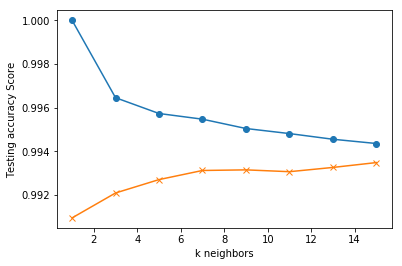

In [28]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 16, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 16, 2), train_scores, marker='o')
plt.plot(range(1, 16, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig("static/images/knn.png")
plt.show()

In [63]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test, y_test))

k=7 Test Acc: 0.993


In [67]:
from sklearn.externals import joblib
knn_filename = 'Saved Models/knn.sav'
joblib.dump(knn, knn_filename)

['Saved Models/knn.sav']

In [38]:
loaded_model = joblib.load(knn_filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9931236080178174


In [71]:
test = knn.predict_proba(X_test)
print(len(test))

35920


In [73]:
for index, item in enumerate(test):
    print(index, item)

0 [1. 0.]
1 [1. 0.]
2 [1. 0.]
3 [1. 0.]
4 [0.71428571 0.28571429]
5 [1. 0.]
6 [1. 0.]
7 [1. 0.]
8 [1. 0.]
9 [1. 0.]
10 [1. 0.]
11 [1. 0.]
12 [1. 0.]
13 [1. 0.]
14 [1. 0.]
15 [1. 0.]
16 [1. 0.]
17 [1. 0.]
18 [1. 0.]
19 [1. 0.]
20 [1. 0.]
21 [1. 0.]
22 [1. 0.]
23 [1. 0.]
24 [1. 0.]
25 [1. 0.]
26 [1. 0.]
27 [1. 0.]
28 [1. 0.]
29 [1. 0.]
30 [1. 0.]
31 [1. 0.]
32 [1. 0.]
33 [1. 0.]
34 [1. 0.]
35 [1. 0.]
36 [1. 0.]
37 [1. 0.]
38 [1. 0.]
39 [1. 0.]
40 [1. 0.]
41 [1. 0.]
42 [0.14285714 0.85714286]
43 [1. 0.]
44 [1. 0.]
45 [1. 0.]
46 [1. 0.]
47 [1. 0.]
48 [1. 0.]
49 [1. 0.]
50 [1. 0.]
51 [1. 0.]
52 [1. 0.]
53 [1. 0.]
54 [1. 0.]
55 [1. 0.]
56 [1. 0.]
57 [1. 0.]
58 [1. 0.]
59 [1. 0.]
60 [1. 0.]
61 [1. 0.]
62 [1. 0.]
63 [1. 0.]
64 [1. 0.]
65 [1. 0.]
66 [1. 0.]
67 [1. 0.]
68 [1. 0.]
69 [1. 0.]
70 [1. 0.]
71 [1. 0.]
72 [1. 0.]
73 [1. 0.]
74 [1. 0.]
75 [1. 0.]
76 [1. 0.]
77 [1. 0.]
78 [1. 0.]
79 [1. 0.]
80 [1. 0.]
81 [1. 0.]
82 [1. 0.]
83 [1. 0.]
84 [1. 0.]
85 [1. 0.]
86 [1. 0.]
87 [1. 0.]
88 [0. 1.]

713 [1. 0.]
714 [1. 0.]
715 [1. 0.]
716 [1. 0.]
717 [1. 0.]
718 [1. 0.]
719 [1. 0.]
720 [1. 0.]
721 [1. 0.]
722 [1. 0.]
723 [0.14285714 0.85714286]
724 [1. 0.]
725 [1. 0.]
726 [1. 0.]
727 [1. 0.]
728 [1. 0.]
729 [1. 0.]
730 [0.14285714 0.85714286]
731 [1. 0.]
732 [1. 0.]
733 [1. 0.]
734 [1. 0.]
735 [1. 0.]
736 [1. 0.]
737 [1. 0.]
738 [1. 0.]
739 [1. 0.]
740 [1. 0.]
741 [1. 0.]
742 [1. 0.]
743 [1. 0.]
744 [1. 0.]
745 [1. 0.]
746 [1. 0.]
747 [1. 0.]
748 [1. 0.]
749 [1. 0.]
750 [1. 0.]
751 [1. 0.]
752 [1. 0.]
753 [1. 0.]
754 [1. 0.]
755 [1. 0.]
756 [1. 0.]
757 [1. 0.]
758 [1. 0.]
759 [1. 0.]
760 [1. 0.]
761 [1. 0.]
762 [1. 0.]
763 [1. 0.]
764 [1. 0.]
765 [1. 0.]
766 [1. 0.]
767 [1. 0.]
768 [1. 0.]
769 [1. 0.]
770 [1. 0.]
771 [1. 0.]
772 [1. 0.]
773 [1. 0.]
774 [1. 0.]
775 [1. 0.]
776 [1. 0.]
777 [1. 0.]
778 [1. 0.]
779 [1. 0.]
780 [1. 0.]
781 [0.57142857 0.42857143]
782 [1. 0.]
783 [1. 0.]
784 [1. 0.]
785 [1. 0.]
786 [1. 0.]
787 [1. 0.]
788 [1. 0.]
789 [1. 0.]
790 [1. 0.]
791 [1. 0.]
792 

1461 [1. 0.]
1462 [1. 0.]
1463 [1. 0.]
1464 [1. 0.]
1465 [1. 0.]
1466 [1. 0.]
1467 [1. 0.]
1468 [1. 0.]
1469 [1. 0.]
1470 [1. 0.]
1471 [1. 0.]
1472 [1. 0.]
1473 [1. 0.]
1474 [1. 0.]
1475 [1. 0.]
1476 [1. 0.]
1477 [1. 0.]
1478 [1. 0.]
1479 [1. 0.]
1480 [1. 0.]
1481 [1. 0.]
1482 [1. 0.]
1483 [1. 0.]
1484 [1. 0.]
1485 [1. 0.]
1486 [1. 0.]
1487 [1. 0.]
1488 [1. 0.]
1489 [1. 0.]
1490 [1. 0.]
1491 [1. 0.]
1492 [1. 0.]
1493 [1. 0.]
1494 [1. 0.]
1495 [1. 0.]
1496 [1. 0.]
1497 [1. 0.]
1498 [1. 0.]
1499 [0.85714286 0.14285714]
1500 [1. 0.]
1501 [1. 0.]
1502 [1. 0.]
1503 [1. 0.]
1504 [1. 0.]
1505 [1. 0.]
1506 [1. 0.]
1507 [1. 0.]
1508 [1. 0.]
1509 [1. 0.]
1510 [1. 0.]
1511 [1. 0.]
1512 [1. 0.]
1513 [1. 0.]
1514 [1. 0.]
1515 [0.28571429 0.71428571]
1516 [1. 0.]
1517 [1. 0.]
1518 [1. 0.]
1519 [1. 0.]
1520 [1. 0.]
1521 [1. 0.]
1522 [0.28571429 0.71428571]
1523 [0.85714286 0.14285714]
1524 [1. 0.]
1525 [1. 0.]
1526 [1. 0.]
1527 [1. 0.]
1528 [1. 0.]
1529 [1. 0.]
1530 [1. 0.]
1531 [1. 0.]
1532 [0.71428

2197 [1. 0.]
2198 [1. 0.]
2199 [1. 0.]
2200 [0.85714286 0.14285714]
2201 [1. 0.]
2202 [1. 0.]
2203 [1. 0.]
2204 [1. 0.]
2205 [1. 0.]
2206 [1. 0.]
2207 [1. 0.]
2208 [1. 0.]
2209 [1. 0.]
2210 [1. 0.]
2211 [0. 1.]
2212 [1. 0.]
2213 [1. 0.]
2214 [1. 0.]
2215 [1. 0.]
2216 [0. 1.]
2217 [1. 0.]
2218 [1. 0.]
2219 [1. 0.]
2220 [1. 0.]
2221 [1. 0.]
2222 [1. 0.]
2223 [1. 0.]
2224 [1. 0.]
2225 [1. 0.]
2226 [1. 0.]
2227 [1. 0.]
2228 [1. 0.]
2229 [1. 0.]
2230 [1. 0.]
2231 [1. 0.]
2232 [1. 0.]
2233 [0. 1.]
2234 [1. 0.]
2235 [1. 0.]
2236 [1. 0.]
2237 [1. 0.]
2238 [1. 0.]
2239 [1. 0.]
2240 [1. 0.]
2241 [1. 0.]
2242 [1. 0.]
2243 [1. 0.]
2244 [1. 0.]
2245 [1. 0.]
2246 [1. 0.]
2247 [1. 0.]
2248 [1. 0.]
2249 [1. 0.]
2250 [1. 0.]
2251 [1. 0.]
2252 [1. 0.]
2253 [1. 0.]
2254 [1. 0.]
2255 [1. 0.]
2256 [1. 0.]
2257 [1. 0.]
2258 [0.71428571 0.28571429]
2259 [1. 0.]
2260 [1. 0.]
2261 [1. 0.]
2262 [1. 0.]
2263 [1. 0.]
2264 [1. 0.]
2265 [1. 0.]
2266 [1. 0.]
2267 [1. 0.]
2268 [1. 0.]
2269 [0.71428571 0.28571429]
227

2947 [1. 0.]
2948 [1. 0.]
2949 [1. 0.]
2950 [1. 0.]
2951 [1. 0.]
2952 [1. 0.]
2953 [1. 0.]
2954 [1. 0.]
2955 [1. 0.]
2956 [1. 0.]
2957 [1. 0.]
2958 [1. 0.]
2959 [1. 0.]
2960 [1. 0.]
2961 [1. 0.]
2962 [1. 0.]
2963 [1. 0.]
2964 [1. 0.]
2965 [1. 0.]
2966 [1. 0.]
2967 [1. 0.]
2968 [1. 0.]
2969 [1. 0.]
2970 [1. 0.]
2971 [1. 0.]
2972 [1. 0.]
2973 [1. 0.]
2974 [1. 0.]
2975 [1. 0.]
2976 [1. 0.]
2977 [1. 0.]
2978 [1. 0.]
2979 [1. 0.]
2980 [1. 0.]
2981 [1. 0.]
2982 [1. 0.]
2983 [1. 0.]
2984 [1. 0.]
2985 [0.85714286 0.14285714]
2986 [1. 0.]
2987 [1. 0.]
2988 [1. 0.]
2989 [1. 0.]
2990 [1. 0.]
2991 [1. 0.]
2992 [1. 0.]
2993 [1. 0.]
2994 [1. 0.]
2995 [1. 0.]
2996 [1. 0.]
2997 [1. 0.]
2998 [1. 0.]
2999 [1. 0.]
3000 [1. 0.]
3001 [1. 0.]
3002 [1. 0.]
3003 [1. 0.]
3004 [1. 0.]
3005 [1. 0.]
3006 [1. 0.]
3007 [1. 0.]
3008 [1. 0.]
3009 [1. 0.]
3010 [1. 0.]
3011 [1. 0.]
3012 [1. 0.]
3013 [1. 0.]
3014 [1. 0.]
3015 [1. 0.]
3016 [0.85714286 0.14285714]
3017 [1. 0.]
3018 [1. 0.]
3019 [1. 0.]
3020 [1. 0.]
3021 [

3689 [1. 0.]
3690 [1. 0.]
3691 [1. 0.]
3692 [1. 0.]
3693 [1. 0.]
3694 [1. 0.]
3695 [1. 0.]
3696 [1. 0.]
3697 [1. 0.]
3698 [1. 0.]
3699 [1. 0.]
3700 [1. 0.]
3701 [1. 0.]
3702 [1. 0.]
3703 [1. 0.]
3704 [1. 0.]
3705 [1. 0.]
3706 [1. 0.]
3707 [1. 0.]
3708 [1. 0.]
3709 [1. 0.]
3710 [0.14285714 0.85714286]
3711 [1. 0.]
3712 [1. 0.]
3713 [1. 0.]
3714 [1. 0.]
3715 [1. 0.]
3716 [1. 0.]
3717 [1. 0.]
3718 [1. 0.]
3719 [1. 0.]
3720 [1. 0.]
3721 [1. 0.]
3722 [1. 0.]
3723 [1. 0.]
3724 [1. 0.]
3725 [1. 0.]
3726 [1. 0.]
3727 [1. 0.]
3728 [1. 0.]
3729 [1. 0.]
3730 [1. 0.]
3731 [1. 0.]
3732 [1. 0.]
3733 [1. 0.]
3734 [1. 0.]
3735 [1. 0.]
3736 [1. 0.]
3737 [1. 0.]
3738 [1. 0.]
3739 [1. 0.]
3740 [1. 0.]
3741 [1. 0.]
3742 [1. 0.]
3743 [1. 0.]
3744 [1. 0.]
3745 [1. 0.]
3746 [1. 0.]
3747 [1. 0.]
3748 [1. 0.]
3749 [1. 0.]
3750 [1. 0.]
3751 [1. 0.]
3752 [1. 0.]
3753 [1. 0.]
3754 [1. 0.]
3755 [1. 0.]
3756 [1. 0.]
3757 [1. 0.]
3758 [1. 0.]
3759 [1. 0.]
3760 [1. 0.]
3761 [1. 0.]
3762 [1. 0.]
3763 [1. 0.]
3764 [1. 

4454 [1. 0.]
4455 [1. 0.]
4456 [1. 0.]
4457 [1. 0.]
4458 [1. 0.]
4459 [1. 0.]
4460 [1. 0.]
4461 [1. 0.]
4462 [1. 0.]
4463 [1. 0.]
4464 [1. 0.]
4465 [1. 0.]
4466 [1. 0.]
4467 [1. 0.]
4468 [1. 0.]
4469 [1. 0.]
4470 [1. 0.]
4471 [1. 0.]
4472 [0. 1.]
4473 [1. 0.]
4474 [1. 0.]
4475 [1. 0.]
4476 [1. 0.]
4477 [1. 0.]
4478 [1. 0.]
4479 [1. 0.]
4480 [1. 0.]
4481 [1. 0.]
4482 [1. 0.]
4483 [1. 0.]
4484 [1. 0.]
4485 [1. 0.]
4486 [1. 0.]
4487 [1. 0.]
4488 [1. 0.]
4489 [1. 0.]
4490 [1. 0.]
4491 [1. 0.]
4492 [1. 0.]
4493 [1. 0.]
4494 [1. 0.]
4495 [1. 0.]
4496 [1. 0.]
4497 [1. 0.]
4498 [1. 0.]
4499 [1. 0.]
4500 [1. 0.]
4501 [1. 0.]
4502 [1. 0.]
4503 [1. 0.]
4504 [1. 0.]
4505 [0.85714286 0.14285714]
4506 [1. 0.]
4507 [1. 0.]
4508 [1. 0.]
4509 [1. 0.]
4510 [1. 0.]
4511 [1. 0.]
4512 [1. 0.]
4513 [1. 0.]
4514 [1. 0.]
4515 [1. 0.]
4516 [1. 0.]
4517 [1. 0.]
4518 [1. 0.]
4519 [1. 0.]
4520 [1. 0.]
4521 [1. 0.]
4522 [1. 0.]
4523 [1. 0.]
4524 [1. 0.]
4525 [1. 0.]
4526 [1. 0.]
4527 [1. 0.]
4528 [1. 0.]
4529 [1. 

5181 [1. 0.]
5182 [1. 0.]
5183 [1. 0.]
5184 [0.71428571 0.28571429]
5185 [1. 0.]
5186 [1. 0.]
5187 [1. 0.]
5188 [1. 0.]
5189 [1. 0.]
5190 [1. 0.]
5191 [1. 0.]
5192 [1. 0.]
5193 [1. 0.]
5194 [1. 0.]
5195 [1. 0.]
5196 [1. 0.]
5197 [1. 0.]
5198 [1. 0.]
5199 [1. 0.]
5200 [1. 0.]
5201 [1. 0.]
5202 [1. 0.]
5203 [1. 0.]
5204 [1. 0.]
5205 [1. 0.]
5206 [1. 0.]
5207 [1. 0.]
5208 [1. 0.]
5209 [1. 0.]
5210 [1. 0.]
5211 [1. 0.]
5212 [1. 0.]
5213 [1. 0.]
5214 [1. 0.]
5215 [1. 0.]
5216 [1. 0.]
5217 [1. 0.]
5218 [1. 0.]
5219 [1. 0.]
5220 [1. 0.]
5221 [1. 0.]
5222 [1. 0.]
5223 [1. 0.]
5224 [1. 0.]
5225 [1. 0.]
5226 [1. 0.]
5227 [1. 0.]
5228 [1. 0.]
5229 [1. 0.]
5230 [1. 0.]
5231 [1. 0.]
5232 [1. 0.]
5233 [1. 0.]
5234 [1. 0.]
5235 [1. 0.]
5236 [1. 0.]
5237 [1. 0.]
5238 [1. 0.]
5239 [1. 0.]
5240 [1. 0.]
5241 [1. 0.]
5242 [1. 0.]
5243 [1. 0.]
5244 [1. 0.]
5245 [1. 0.]
5246 [1. 0.]
5247 [1. 0.]
5248 [1. 0.]
5249 [1. 0.]
5250 [1. 0.]
5251 [1. 0.]
5252 [1. 0.]
5253 [1. 0.]
5254 [1. 0.]
5255 [1. 0.]
5256 [1. 

5903 [1. 0.]
5904 [1. 0.]
5905 [1. 0.]
5906 [1. 0.]
5907 [1. 0.]
5908 [1. 0.]
5909 [1. 0.]
5910 [0.57142857 0.42857143]
5911 [1. 0.]
5912 [1. 0.]
5913 [1. 0.]
5914 [1. 0.]
5915 [1. 0.]
5916 [1. 0.]
5917 [1. 0.]
5918 [1. 0.]
5919 [1. 0.]
5920 [1. 0.]
5921 [1. 0.]
5922 [1. 0.]
5923 [1. 0.]
5924 [1. 0.]
5925 [1. 0.]
5926 [1. 0.]
5927 [1. 0.]
5928 [1. 0.]
5929 [1. 0.]
5930 [1. 0.]
5931 [1. 0.]
5932 [1. 0.]
5933 [1. 0.]
5934 [1. 0.]
5935 [1. 0.]
5936 [1. 0.]
5937 [1. 0.]
5938 [1. 0.]
5939 [1. 0.]
5940 [1. 0.]
5941 [1. 0.]
5942 [1. 0.]
5943 [1. 0.]
5944 [1. 0.]
5945 [1. 0.]
5946 [1. 0.]
5947 [1. 0.]
5948 [0.85714286 0.14285714]
5949 [1. 0.]
5950 [1. 0.]
5951 [1. 0.]
5952 [1. 0.]
5953 [1. 0.]
5954 [1. 0.]
5955 [1. 0.]
5956 [1. 0.]
5957 [1. 0.]
5958 [1. 0.]
5959 [0.71428571 0.28571429]
5960 [1. 0.]
5961 [1. 0.]
5962 [0.42857143 0.57142857]
5963 [1. 0.]
5964 [1. 0.]
5965 [1. 0.]
5966 [1. 0.]
5967 [1. 0.]
5968 [0.85714286 0.14285714]
5969 [1. 0.]
5970 [1. 0.]
5971 [1. 0.]
5972 [1. 0.]
5973 [1. 0

6700 [0.28571429 0.71428571]
6701 [1. 0.]
6702 [1. 0.]
6703 [1. 0.]
6704 [1. 0.]
6705 [1. 0.]
6706 [1. 0.]
6707 [1. 0.]
6708 [1. 0.]
6709 [1. 0.]
6710 [1. 0.]
6711 [1. 0.]
6712 [1. 0.]
6713 [1. 0.]
6714 [1. 0.]
6715 [1. 0.]
6716 [1. 0.]
6717 [1. 0.]
6718 [1. 0.]
6719 [1. 0.]
6720 [1. 0.]
6721 [1. 0.]
6722 [1. 0.]
6723 [1. 0.]
6724 [1. 0.]
6725 [1. 0.]
6726 [1. 0.]
6727 [1. 0.]
6728 [1. 0.]
6729 [1. 0.]
6730 [1. 0.]
6731 [1. 0.]
6732 [1. 0.]
6733 [1. 0.]
6734 [0.28571429 0.71428571]
6735 [1. 0.]
6736 [1. 0.]
6737 [1. 0.]
6738 [1. 0.]
6739 [1. 0.]
6740 [1. 0.]
6741 [1. 0.]
6742 [1. 0.]
6743 [1. 0.]
6744 [1. 0.]
6745 [1. 0.]
6746 [1. 0.]
6747 [1. 0.]
6748 [1. 0.]
6749 [1. 0.]
6750 [1. 0.]
6751 [1. 0.]
6752 [1. 0.]
6753 [1. 0.]
6754 [1. 0.]
6755 [1. 0.]
6756 [1. 0.]
6757 [1. 0.]
6758 [1. 0.]
6759 [1. 0.]
6760 [1. 0.]
6761 [1. 0.]
6762 [1. 0.]
6763 [1. 0.]
6764 [1. 0.]
6765 [1. 0.]
6766 [1. 0.]
6767 [1. 0.]
6768 [1. 0.]
6769 [1. 0.]
6770 [1. 0.]
6771 [1. 0.]
6772 [1. 0.]
6773 [1. 0.]
6774 [

7436 [1. 0.]
7437 [1. 0.]
7438 [1. 0.]
7439 [1. 0.]
7440 [1. 0.]
7441 [0. 1.]
7442 [1. 0.]
7443 [1. 0.]
7444 [1. 0.]
7445 [1. 0.]
7446 [1. 0.]
7447 [1. 0.]
7448 [1. 0.]
7449 [1. 0.]
7450 [1. 0.]
7451 [0.71428571 0.28571429]
7452 [1. 0.]
7453 [1. 0.]
7454 [1. 0.]
7455 [1. 0.]
7456 [1. 0.]
7457 [1. 0.]
7458 [1. 0.]
7459 [1. 0.]
7460 [1. 0.]
7461 [1. 0.]
7462 [1. 0.]
7463 [1. 0.]
7464 [1. 0.]
7465 [1. 0.]
7466 [1. 0.]
7467 [1. 0.]
7468 [1. 0.]
7469 [1. 0.]
7470 [1. 0.]
7471 [1. 0.]
7472 [1. 0.]
7473 [1. 0.]
7474 [1. 0.]
7475 [1. 0.]
7476 [1. 0.]
7477 [1. 0.]
7478 [1. 0.]
7479 [1. 0.]
7480 [1. 0.]
7481 [1. 0.]
7482 [1. 0.]
7483 [1. 0.]
7484 [1. 0.]
7485 [1. 0.]
7486 [1. 0.]
7487 [0. 1.]
7488 [1. 0.]
7489 [1. 0.]
7490 [1. 0.]
7491 [1. 0.]
7492 [1. 0.]
7493 [1. 0.]
7494 [1. 0.]
7495 [1. 0.]
7496 [1. 0.]
7497 [1. 0.]
7498 [1. 0.]
7499 [1. 0.]
7500 [1. 0.]
7501 [1. 0.]
7502 [1. 0.]
7503 [1. 0.]
7504 [1. 0.]
7505 [1. 0.]
7506 [1. 0.]
7507 [1. 0.]
7508 [1. 0.]
7509 [1. 0.]
7510 [1. 0.]
7511 [1. 

8197 [1. 0.]
8198 [1. 0.]
8199 [1. 0.]
8200 [1. 0.]
8201 [1. 0.]
8202 [1. 0.]
8203 [1. 0.]
8204 [1. 0.]
8205 [1. 0.]
8206 [1. 0.]
8207 [1. 0.]
8208 [1. 0.]
8209 [1. 0.]
8210 [1. 0.]
8211 [1. 0.]
8212 [1. 0.]
8213 [1. 0.]
8214 [1. 0.]
8215 [1. 0.]
8216 [1. 0.]
8217 [1. 0.]
8218 [1. 0.]
8219 [1. 0.]
8220 [1. 0.]
8221 [1. 0.]
8222 [1. 0.]
8223 [1. 0.]
8224 [1. 0.]
8225 [1. 0.]
8226 [1. 0.]
8227 [1. 0.]
8228 [1. 0.]
8229 [1. 0.]
8230 [1. 0.]
8231 [1. 0.]
8232 [1. 0.]
8233 [1. 0.]
8234 [1. 0.]
8235 [1. 0.]
8236 [1. 0.]
8237 [0. 1.]
8238 [1. 0.]
8239 [1. 0.]
8240 [1. 0.]
8241 [1. 0.]
8242 [1. 0.]
8243 [1. 0.]
8244 [1. 0.]
8245 [1. 0.]
8246 [1. 0.]
8247 [1. 0.]
8248 [1. 0.]
8249 [1. 0.]
8250 [1. 0.]
8251 [1. 0.]
8252 [1. 0.]
8253 [1. 0.]
8254 [0.57142857 0.42857143]
8255 [1. 0.]
8256 [1. 0.]
8257 [1. 0.]
8258 [1. 0.]
8259 [1. 0.]
8260 [1. 0.]
8261 [1. 0.]
8262 [1. 0.]
8263 [1. 0.]
8264 [1. 0.]
8265 [1. 0.]
8266 [1. 0.]
8267 [1. 0.]
8268 [1. 0.]
8269 [1. 0.]
8270 [1. 0.]
8271 [1. 0.]
8272 [1. 

8955 [0.14285714 0.85714286]
8956 [1. 0.]
8957 [1. 0.]
8958 [1. 0.]
8959 [1. 0.]
8960 [1. 0.]
8961 [1. 0.]
8962 [1. 0.]
8963 [1. 0.]
8964 [1. 0.]
8965 [1. 0.]
8966 [1. 0.]
8967 [1. 0.]
8968 [1. 0.]
8969 [1. 0.]
8970 [1. 0.]
8971 [1. 0.]
8972 [1. 0.]
8973 [1. 0.]
8974 [1. 0.]
8975 [1. 0.]
8976 [1. 0.]
8977 [1. 0.]
8978 [1. 0.]
8979 [1. 0.]
8980 [1. 0.]
8981 [1. 0.]
8982 [1. 0.]
8983 [1. 0.]
8984 [1. 0.]
8985 [1. 0.]
8986 [1. 0.]
8987 [1. 0.]
8988 [1. 0.]
8989 [1. 0.]
8990 [1. 0.]
8991 [1. 0.]
8992 [1. 0.]
8993 [1. 0.]
8994 [1. 0.]
8995 [1. 0.]
8996 [1. 0.]
8997 [1. 0.]
8998 [1. 0.]
8999 [1. 0.]
9000 [1. 0.]
9001 [1. 0.]
9002 [1. 0.]
9003 [1. 0.]
9004 [1. 0.]
9005 [1. 0.]
9006 [1. 0.]
9007 [1. 0.]
9008 [1. 0.]
9009 [1. 0.]
9010 [1. 0.]
9011 [1. 0.]
9012 [1. 0.]
9013 [1. 0.]
9014 [1. 0.]
9015 [1. 0.]
9016 [1. 0.]
9017 [1. 0.]
9018 [1. 0.]
9019 [1. 0.]
9020 [1. 0.]
9021 [1. 0.]
9022 [1. 0.]
9023 [1. 0.]
9024 [1. 0.]
9025 [1. 0.]
9026 [1. 0.]
9027 [1. 0.]
9028 [1. 0.]
9029 [1. 0.]
9030 [1. 

9695 [1. 0.]
9696 [1. 0.]
9697 [1. 0.]
9698 [1. 0.]
9699 [1. 0.]
9700 [1. 0.]
9701 [1. 0.]
9702 [1. 0.]
9703 [1. 0.]
9704 [1. 0.]
9705 [1. 0.]
9706 [1. 0.]
9707 [1. 0.]
9708 [1. 0.]
9709 [1. 0.]
9710 [1. 0.]
9711 [1. 0.]
9712 [1. 0.]
9713 [1. 0.]
9714 [1. 0.]
9715 [1. 0.]
9716 [1. 0.]
9717 [1. 0.]
9718 [1. 0.]
9719 [1. 0.]
9720 [1. 0.]
9721 [1. 0.]
9722 [1. 0.]
9723 [1. 0.]
9724 [1. 0.]
9725 [1. 0.]
9726 [1. 0.]
9727 [1. 0.]
9728 [1. 0.]
9729 [1. 0.]
9730 [0.71428571 0.28571429]
9731 [1. 0.]
9732 [1. 0.]
9733 [1. 0.]
9734 [1. 0.]
9735 [1. 0.]
9736 [1. 0.]
9737 [1. 0.]
9738 [1. 0.]
9739 [1. 0.]
9740 [1. 0.]
9741 [1. 0.]
9742 [1. 0.]
9743 [1. 0.]
9744 [1. 0.]
9745 [1. 0.]
9746 [1. 0.]
9747 [1. 0.]
9748 [1. 0.]
9749 [1. 0.]
9750 [0. 1.]
9751 [1. 0.]
9752 [1. 0.]
9753 [1. 0.]
9754 [1. 0.]
9755 [0.85714286 0.14285714]
9756 [1. 0.]
9757 [1. 0.]
9758 [1. 0.]
9759 [1. 0.]
9760 [1. 0.]
9761 [0.14285714 0.85714286]
9762 [1. 0.]
9763 [1. 0.]
9764 [1. 0.]
9765 [1. 0.]
9766 [1. 0.]
9767 [1. 0.]
976

10419 [1. 0.]
10420 [1. 0.]
10421 [1. 0.]
10422 [1. 0.]
10423 [1. 0.]
10424 [1. 0.]
10425 [1. 0.]
10426 [1. 0.]
10427 [1. 0.]
10428 [1. 0.]
10429 [1. 0.]
10430 [1. 0.]
10431 [0.14285714 0.85714286]
10432 [1. 0.]
10433 [1. 0.]
10434 [1. 0.]
10435 [1. 0.]
10436 [1. 0.]
10437 [1. 0.]
10438 [1. 0.]
10439 [1. 0.]
10440 [1. 0.]
10441 [1. 0.]
10442 [1. 0.]
10443 [1. 0.]
10444 [1. 0.]
10445 [1. 0.]
10446 [1. 0.]
10447 [1. 0.]
10448 [1. 0.]
10449 [1. 0.]
10450 [1. 0.]
10451 [1. 0.]
10452 [1. 0.]
10453 [1. 0.]
10454 [1. 0.]
10455 [1. 0.]
10456 [1. 0.]
10457 [1. 0.]
10458 [0.71428571 0.28571429]
10459 [1. 0.]
10460 [0.57142857 0.42857143]
10461 [1. 0.]
10462 [1. 0.]
10463 [1. 0.]
10464 [1. 0.]
10465 [1. 0.]
10466 [1. 0.]
10467 [1. 0.]
10468 [1. 0.]
10469 [1. 0.]
10470 [1. 0.]
10471 [1. 0.]
10472 [1. 0.]
10473 [1. 0.]
10474 [1. 0.]
10475 [1. 0.]
10476 [1. 0.]
10477 [1. 0.]
10478 [1. 0.]
10479 [1. 0.]
10480 [1. 0.]
10481 [1. 0.]
10482 [1. 0.]
10483 [1. 0.]
10484 [1. 0.]
10485 [1. 0.]
10486 [1. 0.]


11195 [1. 0.]
11196 [1. 0.]
11197 [1. 0.]
11198 [0.42857143 0.57142857]
11199 [1. 0.]
11200 [1. 0.]
11201 [1. 0.]
11202 [1. 0.]
11203 [1. 0.]
11204 [1. 0.]
11205 [1. 0.]
11206 [1. 0.]
11207 [1. 0.]
11208 [1. 0.]
11209 [1. 0.]
11210 [1. 0.]
11211 [1. 0.]
11212 [1. 0.]
11213 [1. 0.]
11214 [1. 0.]
11215 [1. 0.]
11216 [1. 0.]
11217 [1. 0.]
11218 [1. 0.]
11219 [0.57142857 0.42857143]
11220 [1. 0.]
11221 [1. 0.]
11222 [1. 0.]
11223 [1. 0.]
11224 [1. 0.]
11225 [1. 0.]
11226 [1. 0.]
11227 [1. 0.]
11228 [1. 0.]
11229 [1. 0.]
11230 [1. 0.]
11231 [1. 0.]
11232 [1. 0.]
11233 [1. 0.]
11234 [1. 0.]
11235 [1. 0.]
11236 [0.85714286 0.14285714]
11237 [1. 0.]
11238 [1. 0.]
11239 [1. 0.]
11240 [1. 0.]
11241 [1. 0.]
11242 [1. 0.]
11243 [1. 0.]
11244 [1. 0.]
11245 [1. 0.]
11246 [1. 0.]
11247 [1. 0.]
11248 [1. 0.]
11249 [1. 0.]
11250 [1. 0.]
11251 [1. 0.]
11252 [1. 0.]
11253 [0. 1.]
11254 [1. 0.]
11255 [1. 0.]
11256 [1. 0.]
11257 [1. 0.]
11258 [1. 0.]
11259 [1. 0.]
11260 [1. 0.]
11261 [1. 0.]
11262 [1. 0.]


11968 [0.85714286 0.14285714]
11969 [1. 0.]
11970 [1. 0.]
11971 [1. 0.]
11972 [1. 0.]
11973 [1. 0.]
11974 [1. 0.]
11975 [1. 0.]
11976 [1. 0.]
11977 [1. 0.]
11978 [1. 0.]
11979 [1. 0.]
11980 [1. 0.]
11981 [1. 0.]
11982 [1. 0.]
11983 [1. 0.]
11984 [1. 0.]
11985 [1. 0.]
11986 [0. 1.]
11987 [1. 0.]
11988 [1. 0.]
11989 [1. 0.]
11990 [1. 0.]
11991 [1. 0.]
11992 [1. 0.]
11993 [1. 0.]
11994 [1. 0.]
11995 [1. 0.]
11996 [0.85714286 0.14285714]
11997 [1. 0.]
11998 [1. 0.]
11999 [1. 0.]
12000 [1. 0.]
12001 [1. 0.]
12002 [1. 0.]
12003 [1. 0.]
12004 [1. 0.]
12005 [1. 0.]
12006 [1. 0.]
12007 [1. 0.]
12008 [1. 0.]
12009 [1. 0.]
12010 [1. 0.]
12011 [1. 0.]
12012 [1. 0.]
12013 [1. 0.]
12014 [1. 0.]
12015 [1. 0.]
12016 [1. 0.]
12017 [1. 0.]
12018 [1. 0.]
12019 [1. 0.]
12020 [1. 0.]
12021 [1. 0.]
12022 [1. 0.]
12023 [1. 0.]
12024 [1. 0.]
12025 [1. 0.]
12026 [1. 0.]
12027 [1. 0.]
12028 [1. 0.]
12029 [1. 0.]
12030 [1. 0.]
12031 [1. 0.]
12032 [0.28571429 0.71428571]
12033 [1. 0.]
12034 [1. 0.]
12035 [1. 0.]


12674 [1. 0.]
12675 [1. 0.]
12676 [1. 0.]
12677 [1. 0.]
12678 [1. 0.]
12679 [1. 0.]
12680 [1. 0.]
12681 [1. 0.]
12682 [0.42857143 0.57142857]
12683 [1. 0.]
12684 [1. 0.]
12685 [1. 0.]
12686 [1. 0.]
12687 [0. 1.]
12688 [1. 0.]
12689 [1. 0.]
12690 [0. 1.]
12691 [1. 0.]
12692 [1. 0.]
12693 [1. 0.]
12694 [1. 0.]
12695 [1. 0.]
12696 [1. 0.]
12697 [1. 0.]
12698 [1. 0.]
12699 [1. 0.]
12700 [1. 0.]
12701 [0. 1.]
12702 [1. 0.]
12703 [1. 0.]
12704 [1. 0.]
12705 [1. 0.]
12706 [1. 0.]
12707 [1. 0.]
12708 [1. 0.]
12709 [1. 0.]
12710 [1. 0.]
12711 [1. 0.]
12712 [1. 0.]
12713 [1. 0.]
12714 [0.28571429 0.71428571]
12715 [1. 0.]
12716 [1. 0.]
12717 [1. 0.]
12718 [1. 0.]
12719 [1. 0.]
12720 [1. 0.]
12721 [1. 0.]
12722 [1. 0.]
12723 [1. 0.]
12724 [1. 0.]
12725 [1. 0.]
12726 [1. 0.]
12727 [1. 0.]
12728 [1. 0.]
12729 [1. 0.]
12730 [1. 0.]
12731 [1. 0.]
12732 [1. 0.]
12733 [1. 0.]
12734 [1. 0.]
12735 [1. 0.]
12736 [1. 0.]
12737 [1. 0.]
12738 [1. 0.]
12739 [1. 0.]
12740 [1. 0.]
12741 [1. 0.]
12742 [1. 0.]
12

13405 [1. 0.]
13406 [1. 0.]
13407 [1. 0.]
13408 [1. 0.]
13409 [1. 0.]
13410 [1. 0.]
13411 [1. 0.]
13412 [1. 0.]
13413 [1. 0.]
13414 [1. 0.]
13415 [1. 0.]
13416 [1. 0.]
13417 [1. 0.]
13418 [1. 0.]
13419 [1. 0.]
13420 [1. 0.]
13421 [1. 0.]
13422 [1. 0.]
13423 [1. 0.]
13424 [1. 0.]
13425 [1. 0.]
13426 [1. 0.]
13427 [1. 0.]
13428 [1. 0.]
13429 [1. 0.]
13430 [1. 0.]
13431 [1. 0.]
13432 [1. 0.]
13433 [1. 0.]
13434 [1. 0.]
13435 [0. 1.]
13436 [0. 1.]
13437 [1. 0.]
13438 [1. 0.]
13439 [1. 0.]
13440 [1. 0.]
13441 [1. 0.]
13442 [1. 0.]
13443 [1. 0.]
13444 [1. 0.]
13445 [1. 0.]
13446 [1. 0.]
13447 [1. 0.]
13448 [1. 0.]
13449 [1. 0.]
13450 [1. 0.]
13451 [1. 0.]
13452 [1. 0.]
13453 [1. 0.]
13454 [1. 0.]
13455 [1. 0.]
13456 [1. 0.]
13457 [1. 0.]
13458 [1. 0.]
13459 [1. 0.]
13460 [1. 0.]
13461 [1. 0.]
13462 [1. 0.]
13463 [1. 0.]
13464 [1. 0.]
13465 [1. 0.]
13466 [1. 0.]
13467 [1. 0.]
13468 [1. 0.]
13469 [1. 0.]
13470 [1. 0.]
13471 [1. 0.]
13472 [1. 0.]
13473 [1. 0.]
13474 [1. 0.]
13475 [1. 0.]
13476 

14203 [1. 0.]
14204 [1. 0.]
14205 [1. 0.]
14206 [1. 0.]
14207 [1. 0.]
14208 [1. 0.]
14209 [1. 0.]
14210 [1. 0.]
14211 [1. 0.]
14212 [1. 0.]
14213 [0.57142857 0.42857143]
14214 [1. 0.]
14215 [1. 0.]
14216 [1. 0.]
14217 [1. 0.]
14218 [1. 0.]
14219 [1. 0.]
14220 [1. 0.]
14221 [1. 0.]
14222 [1. 0.]
14223 [1. 0.]
14224 [1. 0.]
14225 [1. 0.]
14226 [1. 0.]
14227 [1. 0.]
14228 [1. 0.]
14229 [1. 0.]
14230 [1. 0.]
14231 [1. 0.]
14232 [1. 0.]
14233 [1. 0.]
14234 [1. 0.]
14235 [0.57142857 0.42857143]
14236 [1. 0.]
14237 [1. 0.]
14238 [1. 0.]
14239 [1. 0.]
14240 [1. 0.]
14241 [1. 0.]
14242 [1. 0.]
14243 [1. 0.]
14244 [1. 0.]
14245 [1. 0.]
14246 [1. 0.]
14247 [1. 0.]
14248 [1. 0.]
14249 [1. 0.]
14250 [1. 0.]
14251 [1. 0.]
14252 [1. 0.]
14253 [1. 0.]
14254 [1. 0.]
14255 [1. 0.]
14256 [1. 0.]
14257 [1. 0.]
14258 [1. 0.]
14259 [1. 0.]
14260 [1. 0.]
14261 [1. 0.]
14262 [1. 0.]
14263 [1. 0.]
14264 [1. 0.]
14265 [1. 0.]
14266 [1. 0.]
14267 [1. 0.]
14268 [1. 0.]
14269 [1. 0.]
14270 [1. 0.]
14271 [1. 0.]
14

14936 [0.57142857 0.42857143]
14937 [0.71428571 0.28571429]
14938 [1. 0.]
14939 [1. 0.]
14940 [1. 0.]
14941 [1. 0.]
14942 [1. 0.]
14943 [1. 0.]
14944 [1. 0.]
14945 [1. 0.]
14946 [1. 0.]
14947 [0.71428571 0.28571429]
14948 [1. 0.]
14949 [0. 1.]
14950 [1. 0.]
14951 [1. 0.]
14952 [1. 0.]
14953 [1. 0.]
14954 [1. 0.]
14955 [1. 0.]
14956 [1. 0.]
14957 [1. 0.]
14958 [1. 0.]
14959 [1. 0.]
14960 [1. 0.]
14961 [1. 0.]
14962 [1. 0.]
14963 [1. 0.]
14964 [1. 0.]
14965 [1. 0.]
14966 [1. 0.]
14967 [1. 0.]
14968 [1. 0.]
14969 [1. 0.]
14970 [1. 0.]
14971 [1. 0.]
14972 [1. 0.]
14973 [1. 0.]
14974 [1. 0.]
14975 [1. 0.]
14976 [1. 0.]
14977 [1. 0.]
14978 [1. 0.]
14979 [1. 0.]
14980 [1. 0.]
14981 [1. 0.]
14982 [1. 0.]
14983 [1. 0.]
14984 [1. 0.]
14985 [1. 0.]
14986 [1. 0.]
14987 [1. 0.]
14988 [1. 0.]
14989 [1. 0.]
14990 [1. 0.]
14991 [1. 0.]
14992 [1. 0.]
14993 [1. 0.]
14994 [1. 0.]
14995 [1. 0.]
14996 [1. 0.]
14997 [1. 0.]
14998 [1. 0.]
14999 [1. 0.]
15000 [1. 0.]
15001 [1. 0.]
15002 [1. 0.]
15003 [1. 0.]


15676 [1. 0.]
15677 [1. 0.]
15678 [1. 0.]
15679 [1. 0.]
15680 [1. 0.]
15681 [1. 0.]
15682 [1. 0.]
15683 [1. 0.]
15684 [1. 0.]
15685 [1. 0.]
15686 [0.14285714 0.85714286]
15687 [1. 0.]
15688 [1. 0.]
15689 [1. 0.]
15690 [1. 0.]
15691 [1. 0.]
15692 [1. 0.]
15693 [1. 0.]
15694 [1. 0.]
15695 [1. 0.]
15696 [1. 0.]
15697 [1. 0.]
15698 [1. 0.]
15699 [1. 0.]
15700 [1. 0.]
15701 [1. 0.]
15702 [1. 0.]
15703 [1. 0.]
15704 [1. 0.]
15705 [1. 0.]
15706 [1. 0.]
15707 [1. 0.]
15708 [1. 0.]
15709 [1. 0.]
15710 [1. 0.]
15711 [1. 0.]
15712 [1. 0.]
15713 [1. 0.]
15714 [1. 0.]
15715 [0. 1.]
15716 [1. 0.]
15717 [1. 0.]
15718 [1. 0.]
15719 [1. 0.]
15720 [1. 0.]
15721 [1. 0.]
15722 [1. 0.]
15723 [1. 0.]
15724 [1. 0.]
15725 [1. 0.]
15726 [1. 0.]
15727 [1. 0.]
15728 [1. 0.]
15729 [1. 0.]
15730 [1. 0.]
15731 [1. 0.]
15732 [1. 0.]
15733 [1. 0.]
15734 [1. 0.]
15735 [1. 0.]
15736 [1. 0.]
15737 [1. 0.]
15738 [0.85714286 0.14285714]
15739 [1. 0.]
15740 [1. 0.]
15741 [1. 0.]
15742 [1. 0.]
15743 [1. 0.]
15744 [1. 0.]
15

16441 [1. 0.]
16442 [1. 0.]
16443 [1. 0.]
16444 [1. 0.]
16445 [1. 0.]
16446 [1. 0.]
16447 [1. 0.]
16448 [1. 0.]
16449 [1. 0.]
16450 [1. 0.]
16451 [1. 0.]
16452 [1. 0.]
16453 [1. 0.]
16454 [1. 0.]
16455 [1. 0.]
16456 [1. 0.]
16457 [1. 0.]
16458 [1. 0.]
16459 [1. 0.]
16460 [1. 0.]
16461 [1. 0.]
16462 [1. 0.]
16463 [1. 0.]
16464 [1. 0.]
16465 [1. 0.]
16466 [1. 0.]
16467 [1. 0.]
16468 [1. 0.]
16469 [1. 0.]
16470 [1. 0.]
16471 [1. 0.]
16472 [1. 0.]
16473 [1. 0.]
16474 [1. 0.]
16475 [1. 0.]
16476 [1. 0.]
16477 [1. 0.]
16478 [0.85714286 0.14285714]
16479 [1. 0.]
16480 [1. 0.]
16481 [1. 0.]
16482 [1. 0.]
16483 [1. 0.]
16484 [1. 0.]
16485 [1. 0.]
16486 [1. 0.]
16487 [1. 0.]
16488 [1. 0.]
16489 [1. 0.]
16490 [1. 0.]
16491 [1. 0.]
16492 [1. 0.]
16493 [1. 0.]
16494 [1. 0.]
16495 [1. 0.]
16496 [1. 0.]
16497 [1. 0.]
16498 [1. 0.]
16499 [1. 0.]
16500 [1. 0.]
16501 [1. 0.]
16502 [1. 0.]
16503 [1. 0.]
16504 [1. 0.]
16505 [1. 0.]
16506 [1. 0.]
16507 [1. 0.]
16508 [1. 0.]
16509 [1. 0.]
16510 [1. 0.]
1651

17201 [1. 0.]
17202 [1. 0.]
17203 [1. 0.]
17204 [1. 0.]
17205 [1. 0.]
17206 [1. 0.]
17207 [1. 0.]
17208 [1. 0.]
17209 [1. 0.]
17210 [1. 0.]
17211 [1. 0.]
17212 [1. 0.]
17213 [1. 0.]
17214 [1. 0.]
17215 [1. 0.]
17216 [1. 0.]
17217 [1. 0.]
17218 [1. 0.]
17219 [1. 0.]
17220 [1. 0.]
17221 [1. 0.]
17222 [1. 0.]
17223 [1. 0.]
17224 [1. 0.]
17225 [1. 0.]
17226 [1. 0.]
17227 [1. 0.]
17228 [1. 0.]
17229 [1. 0.]
17230 [1. 0.]
17231 [1. 0.]
17232 [1. 0.]
17233 [1. 0.]
17234 [0.28571429 0.71428571]
17235 [1. 0.]
17236 [1. 0.]
17237 [1. 0.]
17238 [1. 0.]
17239 [1. 0.]
17240 [1. 0.]
17241 [1. 0.]
17242 [1. 0.]
17243 [1. 0.]
17244 [1. 0.]
17245 [1. 0.]
17246 [0.85714286 0.14285714]
17247 [1. 0.]
17248 [1. 0.]
17249 [1. 0.]
17250 [1. 0.]
17251 [1. 0.]
17252 [1. 0.]
17253 [1. 0.]
17254 [1. 0.]
17255 [1. 0.]
17256 [1. 0.]
17257 [1. 0.]
17258 [1. 0.]
17259 [1. 0.]
17260 [1. 0.]
17261 [1. 0.]
17262 [1. 0.]
17263 [1. 0.]
17264 [1. 0.]
17265 [1. 0.]
17266 [1. 0.]
17267 [1. 0.]
17268 [1. 0.]
17269 [1. 0.]
17

17929 [1. 0.]
17930 [1. 0.]
17931 [1. 0.]
17932 [1. 0.]
17933 [1. 0.]
17934 [1. 0.]
17935 [1. 0.]
17936 [1. 0.]
17937 [1. 0.]
17938 [1. 0.]
17939 [1. 0.]
17940 [1. 0.]
17941 [0. 1.]
17942 [1. 0.]
17943 [1. 0.]
17944 [1. 0.]
17945 [1. 0.]
17946 [1. 0.]
17947 [1. 0.]
17948 [1. 0.]
17949 [1. 0.]
17950 [1. 0.]
17951 [1. 0.]
17952 [1. 0.]
17953 [1. 0.]
17954 [0.71428571 0.28571429]
17955 [1. 0.]
17956 [1. 0.]
17957 [1. 0.]
17958 [1. 0.]
17959 [1. 0.]
17960 [1. 0.]
17961 [1. 0.]
17962 [1. 0.]
17963 [1. 0.]
17964 [1. 0.]
17965 [1. 0.]
17966 [1. 0.]
17967 [1. 0.]
17968 [1. 0.]
17969 [1. 0.]
17970 [1. 0.]
17971 [1. 0.]
17972 [1. 0.]
17973 [1. 0.]
17974 [1. 0.]
17975 [1. 0.]
17976 [1. 0.]
17977 [1. 0.]
17978 [1. 0.]
17979 [1. 0.]
17980 [1. 0.]
17981 [1. 0.]
17982 [1. 0.]
17983 [1. 0.]
17984 [1. 0.]
17985 [1. 0.]
17986 [1. 0.]
17987 [1. 0.]
17988 [1. 0.]
17989 [1. 0.]
17990 [1. 0.]
17991 [1. 0.]
17992 [1. 0.]
17993 [1. 0.]
17994 [1. 0.]
17995 [1. 0.]
17996 [1. 0.]
17997 [1. 0.]
17998 [0.57142857 

18682 [1. 0.]
18683 [1. 0.]
18684 [1. 0.]
18685 [1. 0.]
18686 [1. 0.]
18687 [1. 0.]
18688 [1. 0.]
18689 [1. 0.]
18690 [1. 0.]
18691 [1. 0.]
18692 [1. 0.]
18693 [1. 0.]
18694 [1. 0.]
18695 [1. 0.]
18696 [1. 0.]
18697 [1. 0.]
18698 [1. 0.]
18699 [1. 0.]
18700 [1. 0.]
18701 [1. 0.]
18702 [1. 0.]
18703 [1. 0.]
18704 [1. 0.]
18705 [1. 0.]
18706 [1. 0.]
18707 [1. 0.]
18708 [1. 0.]
18709 [1. 0.]
18710 [1. 0.]
18711 [1. 0.]
18712 [1. 0.]
18713 [1. 0.]
18714 [1. 0.]
18715 [1. 0.]
18716 [1. 0.]
18717 [1. 0.]
18718 [1. 0.]
18719 [1. 0.]
18720 [1. 0.]
18721 [1. 0.]
18722 [1. 0.]
18723 [1. 0.]
18724 [0.14285714 0.85714286]
18725 [1. 0.]
18726 [1. 0.]
18727 [1. 0.]
18728 [1. 0.]
18729 [1. 0.]
18730 [1. 0.]
18731 [1. 0.]
18732 [1. 0.]
18733 [1. 0.]
18734 [1. 0.]
18735 [1. 0.]
18736 [1. 0.]
18737 [1. 0.]
18738 [1. 0.]
18739 [1. 0.]
18740 [1. 0.]
18741 [1. 0.]
18742 [1. 0.]
18743 [1. 0.]
18744 [1. 0.]
18745 [1. 0.]
18746 [1. 0.]
18747 [1. 0.]
18748 [1. 0.]
18749 [1. 0.]
18750 [1. 0.]
18751 [1. 0.]
1875

19420 [1. 0.]
19421 [0.71428571 0.28571429]
19422 [1. 0.]
19423 [1. 0.]
19424 [1. 0.]
19425 [1. 0.]
19426 [1. 0.]
19427 [1. 0.]
19428 [1. 0.]
19429 [1. 0.]
19430 [1. 0.]
19431 [1. 0.]
19432 [1. 0.]
19433 [1. 0.]
19434 [1. 0.]
19435 [1. 0.]
19436 [1. 0.]
19437 [1. 0.]
19438 [1. 0.]
19439 [1. 0.]
19440 [1. 0.]
19441 [1. 0.]
19442 [1. 0.]
19443 [1. 0.]
19444 [1. 0.]
19445 [1. 0.]
19446 [0.28571429 0.71428571]
19447 [1. 0.]
19448 [1. 0.]
19449 [1. 0.]
19450 [1. 0.]
19451 [1. 0.]
19452 [1. 0.]
19453 [1. 0.]
19454 [1. 0.]
19455 [1. 0.]
19456 [1. 0.]
19457 [1. 0.]
19458 [1. 0.]
19459 [1. 0.]
19460 [1. 0.]
19461 [1. 0.]
19462 [1. 0.]
19463 [1. 0.]
19464 [1. 0.]
19465 [1. 0.]
19466 [1. 0.]
19467 [1. 0.]
19468 [1. 0.]
19469 [1. 0.]
19470 [1. 0.]
19471 [1. 0.]
19472 [1. 0.]
19473 [0.57142857 0.42857143]
19474 [0.71428571 0.28571429]
19475 [1. 0.]
19476 [1. 0.]
19477 [1. 0.]
19478 [1. 0.]
19479 [1. 0.]
19480 [1. 0.]
19481 [1. 0.]
19482 [1. 0.]
19483 [1. 0.]
19484 [1. 0.]
19485 [0.42857143 0.571428

20176 [1. 0.]
20177 [1. 0.]
20178 [1. 0.]
20179 [1. 0.]
20180 [1. 0.]
20181 [0.28571429 0.71428571]
20182 [1. 0.]
20183 [1. 0.]
20184 [1. 0.]
20185 [1. 0.]
20186 [1. 0.]
20187 [1. 0.]
20188 [1. 0.]
20189 [1. 0.]
20190 [1. 0.]
20191 [1. 0.]
20192 [1. 0.]
20193 [1. 0.]
20194 [1. 0.]
20195 [1. 0.]
20196 [1. 0.]
20197 [1. 0.]
20198 [1. 0.]
20199 [1. 0.]
20200 [1. 0.]
20201 [1. 0.]
20202 [1. 0.]
20203 [1. 0.]
20204 [0. 1.]
20205 [1. 0.]
20206 [1. 0.]
20207 [1. 0.]
20208 [1. 0.]
20209 [1. 0.]
20210 [1. 0.]
20211 [1. 0.]
20212 [1. 0.]
20213 [1. 0.]
20214 [1. 0.]
20215 [1. 0.]
20216 [0.85714286 0.14285714]
20217 [1. 0.]
20218 [1. 0.]
20219 [1. 0.]
20220 [1. 0.]
20221 [1. 0.]
20222 [1. 0.]
20223 [1. 0.]
20224 [0.42857143 0.57142857]
20225 [1. 0.]
20226 [1. 0.]
20227 [1. 0.]
20228 [1. 0.]
20229 [1. 0.]
20230 [1. 0.]
20231 [1. 0.]
20232 [0.57142857 0.42857143]
20233 [1. 0.]
20234 [1. 0.]
20235 [1. 0.]
20236 [1. 0.]
20237 [1. 0.]
20238 [1. 0.]
20239 [1. 0.]
20240 [1. 0.]
20241 [1. 0.]
20242 [1. 0.

20924 [1. 0.]
20925 [1. 0.]
20926 [1. 0.]
20927 [1. 0.]
20928 [1. 0.]
20929 [1. 0.]
20930 [1. 0.]
20931 [1. 0.]
20932 [1. 0.]
20933 [1. 0.]
20934 [1. 0.]
20935 [1. 0.]
20936 [1. 0.]
20937 [1. 0.]
20938 [1. 0.]
20939 [1. 0.]
20940 [1. 0.]
20941 [1. 0.]
20942 [1. 0.]
20943 [1. 0.]
20944 [1. 0.]
20945 [1. 0.]
20946 [1. 0.]
20947 [1. 0.]
20948 [1. 0.]
20949 [1. 0.]
20950 [1. 0.]
20951 [1. 0.]
20952 [1. 0.]
20953 [1. 0.]
20954 [1. 0.]
20955 [1. 0.]
20956 [1. 0.]
20957 [0. 1.]
20958 [1. 0.]
20959 [1. 0.]
20960 [1. 0.]
20961 [1. 0.]
20962 [1. 0.]
20963 [1. 0.]
20964 [1. 0.]
20965 [1. 0.]
20966 [1. 0.]
20967 [1. 0.]
20968 [1. 0.]
20969 [1. 0.]
20970 [1. 0.]
20971 [1. 0.]
20972 [1. 0.]
20973 [1. 0.]
20974 [1. 0.]
20975 [1. 0.]
20976 [1. 0.]
20977 [1. 0.]
20978 [1. 0.]
20979 [1. 0.]
20980 [1. 0.]
20981 [1. 0.]
20982 [1. 0.]
20983 [1. 0.]
20984 [1. 0.]
20985 [1. 0.]
20986 [1. 0.]
20987 [1. 0.]
20988 [1. 0.]
20989 [1. 0.]
20990 [1. 0.]
20991 [1. 0.]
20992 [1. 0.]
20993 [1. 0.]
20994 [1. 0.]
20995 

21683 [1. 0.]
21684 [1. 0.]
21685 [1. 0.]
21686 [0.14285714 0.85714286]
21687 [1. 0.]
21688 [1. 0.]
21689 [1. 0.]
21690 [1. 0.]
21691 [0.71428571 0.28571429]
21692 [1. 0.]
21693 [1. 0.]
21694 [1. 0.]
21695 [1. 0.]
21696 [1. 0.]
21697 [1. 0.]
21698 [1. 0.]
21699 [1. 0.]
21700 [1. 0.]
21701 [1. 0.]
21702 [1. 0.]
21703 [1. 0.]
21704 [1. 0.]
21705 [1. 0.]
21706 [1. 0.]
21707 [1. 0.]
21708 [1. 0.]
21709 [1. 0.]
21710 [1. 0.]
21711 [1. 0.]
21712 [1. 0.]
21713 [1. 0.]
21714 [1. 0.]
21715 [1. 0.]
21716 [1. 0.]
21717 [1. 0.]
21718 [1. 0.]
21719 [1. 0.]
21720 [1. 0.]
21721 [1. 0.]
21722 [1. 0.]
21723 [1. 0.]
21724 [1. 0.]
21725 [1. 0.]
21726 [1. 0.]
21727 [1. 0.]
21728 [1. 0.]
21729 [1. 0.]
21730 [1. 0.]
21731 [1. 0.]
21732 [1. 0.]
21733 [1. 0.]
21734 [1. 0.]
21735 [1. 0.]
21736 [1. 0.]
21737 [0.42857143 0.57142857]
21738 [1. 0.]
21739 [1. 0.]
21740 [1. 0.]
21741 [0. 1.]
21742 [1. 0.]
21743 [1. 0.]
21744 [1. 0.]
21745 [1. 0.]
21746 [1. 0.]
21747 [1. 0.]
21748 [1. 0.]
21749 [1. 0.]
21750 [1. 0.]


22409 [1. 0.]
22410 [1. 0.]
22411 [1. 0.]
22412 [1. 0.]
22413 [1. 0.]
22414 [1. 0.]
22415 [1. 0.]
22416 [1. 0.]
22417 [1. 0.]
22418 [1. 0.]
22419 [1. 0.]
22420 [1. 0.]
22421 [1. 0.]
22422 [1. 0.]
22423 [1. 0.]
22424 [1. 0.]
22425 [1. 0.]
22426 [1. 0.]
22427 [0.57142857 0.42857143]
22428 [1. 0.]
22429 [1. 0.]
22430 [1. 0.]
22431 [1. 0.]
22432 [1. 0.]
22433 [1. 0.]
22434 [0.42857143 0.57142857]
22435 [1. 0.]
22436 [1. 0.]
22437 [1. 0.]
22438 [1. 0.]
22439 [1. 0.]
22440 [1. 0.]
22441 [1. 0.]
22442 [1. 0.]
22443 [1. 0.]
22444 [1. 0.]
22445 [1. 0.]
22446 [1. 0.]
22447 [1. 0.]
22448 [1. 0.]
22449 [1. 0.]
22450 [1. 0.]
22451 [1. 0.]
22452 [1. 0.]
22453 [1. 0.]
22454 [1. 0.]
22455 [1. 0.]
22456 [1. 0.]
22457 [1. 0.]
22458 [1. 0.]
22459 [1. 0.]
22460 [1. 0.]
22461 [1. 0.]
22462 [1. 0.]
22463 [1. 0.]
22464 [1. 0.]
22465 [1. 0.]
22466 [1. 0.]
22467 [1. 0.]
22468 [1. 0.]
22469 [1. 0.]
22470 [1. 0.]
22471 [0.14285714 0.85714286]
22472 [1. 0.]
22473 [1. 0.]
22474 [1. 0.]
22475 [1. 0.]
22476 [1. 0.]


23193 [1. 0.]
23194 [1. 0.]
23195 [1. 0.]
23196 [1. 0.]
23197 [1. 0.]
23198 [1. 0.]
23199 [1. 0.]
23200 [1. 0.]
23201 [1. 0.]
23202 [1. 0.]
23203 [1. 0.]
23204 [1. 0.]
23205 [1. 0.]
23206 [1. 0.]
23207 [1. 0.]
23208 [1. 0.]
23209 [1. 0.]
23210 [1. 0.]
23211 [1. 0.]
23212 [1. 0.]
23213 [1. 0.]
23214 [1. 0.]
23215 [1. 0.]
23216 [1. 0.]
23217 [1. 0.]
23218 [1. 0.]
23219 [1. 0.]
23220 [1. 0.]
23221 [1. 0.]
23222 [1. 0.]
23223 [1. 0.]
23224 [1. 0.]
23225 [1. 0.]
23226 [1. 0.]
23227 [0. 1.]
23228 [0. 1.]
23229 [1. 0.]
23230 [1. 0.]
23231 [1. 0.]
23232 [1. 0.]
23233 [1. 0.]
23234 [1. 0.]
23235 [1. 0.]
23236 [1. 0.]
23237 [1. 0.]
23238 [1. 0.]
23239 [0.71428571 0.28571429]
23240 [1. 0.]
23241 [0. 1.]
23242 [1. 0.]
23243 [1. 0.]
23244 [1. 0.]
23245 [1. 0.]
23246 [1. 0.]
23247 [1. 0.]
23248 [1. 0.]
23249 [1. 0.]
23250 [1. 0.]
23251 [1. 0.]
23252 [1. 0.]
23253 [1. 0.]
23254 [1. 0.]
23255 [1. 0.]
23256 [1. 0.]
23257 [1. 0.]
23258 [1. 0.]
23259 [1. 0.]
23260 [1. 0.]
23261 [1. 0.]
23262 [1. 0.]
2326

23940 [1. 0.]
23941 [1. 0.]
23942 [1. 0.]
23943 [1. 0.]
23944 [1. 0.]
23945 [1. 0.]
23946 [1. 0.]
23947 [1. 0.]
23948 [1. 0.]
23949 [1. 0.]
23950 [1. 0.]
23951 [1. 0.]
23952 [1. 0.]
23953 [1. 0.]
23954 [1. 0.]
23955 [1. 0.]
23956 [1. 0.]
23957 [1. 0.]
23958 [1. 0.]
23959 [1. 0.]
23960 [1. 0.]
23961 [1. 0.]
23962 [1. 0.]
23963 [1. 0.]
23964 [1. 0.]
23965 [1. 0.]
23966 [1. 0.]
23967 [1. 0.]
23968 [1. 0.]
23969 [1. 0.]
23970 [1. 0.]
23971 [1. 0.]
23972 [1. 0.]
23973 [1. 0.]
23974 [1. 0.]
23975 [1. 0.]
23976 [1. 0.]
23977 [1. 0.]
23978 [1. 0.]
23979 [1. 0.]
23980 [1. 0.]
23981 [1. 0.]
23982 [1. 0.]
23983 [1. 0.]
23984 [1. 0.]
23985 [1. 0.]
23986 [1. 0.]
23987 [1. 0.]
23988 [1. 0.]
23989 [1. 0.]
23990 [1. 0.]
23991 [1. 0.]
23992 [1. 0.]
23993 [1. 0.]
23994 [1. 0.]
23995 [1. 0.]
23996 [1. 0.]
23997 [0.85714286 0.14285714]
23998 [1. 0.]
23999 [1. 0.]
24000 [1. 0.]
24001 [1. 0.]
24002 [1. 0.]
24003 [1. 0.]
24004 [1. 0.]
24005 [1. 0.]
24006 [1. 0.]
24007 [1. 0.]
24008 [1. 0.]
24009 [1. 0.]
2401

24702 [1. 0.]
24703 [1. 0.]
24704 [1. 0.]
24705 [1. 0.]
24706 [1. 0.]
24707 [1. 0.]
24708 [1. 0.]
24709 [1. 0.]
24710 [1. 0.]
24711 [1. 0.]
24712 [1. 0.]
24713 [1. 0.]
24714 [1. 0.]
24715 [1. 0.]
24716 [1. 0.]
24717 [1. 0.]
24718 [1. 0.]
24719 [1. 0.]
24720 [1. 0.]
24721 [1. 0.]
24722 [1. 0.]
24723 [1. 0.]
24724 [1. 0.]
24725 [1. 0.]
24726 [1. 0.]
24727 [1. 0.]
24728 [1. 0.]
24729 [1. 0.]
24730 [1. 0.]
24731 [1. 0.]
24732 [1. 0.]
24733 [1. 0.]
24734 [1. 0.]
24735 [1. 0.]
24736 [1. 0.]
24737 [1. 0.]
24738 [1. 0.]
24739 [1. 0.]
24740 [1. 0.]
24741 [1. 0.]
24742 [1. 0.]
24743 [1. 0.]
24744 [1. 0.]
24745 [1. 0.]
24746 [1. 0.]
24747 [1. 0.]
24748 [1. 0.]
24749 [1. 0.]
24750 [1. 0.]
24751 [1. 0.]
24752 [1. 0.]
24753 [1. 0.]
24754 [1. 0.]
24755 [1. 0.]
24756 [1. 0.]
24757 [1. 0.]
24758 [1. 0.]
24759 [1. 0.]
24760 [1. 0.]
24761 [1. 0.]
24762 [1. 0.]
24763 [1. 0.]
24764 [1. 0.]
24765 [1. 0.]
24766 [1. 0.]
24767 [1. 0.]
24768 [1. 0.]
24769 [1. 0.]
24770 [1. 0.]
24771 [1. 0.]
24772 [1. 0.]
24773 

25424 [1. 0.]
25425 [1. 0.]
25426 [1. 0.]
25427 [1. 0.]
25428 [1. 0.]
25429 [1. 0.]
25430 [1. 0.]
25431 [1. 0.]
25432 [1. 0.]
25433 [1. 0.]
25434 [1. 0.]
25435 [1. 0.]
25436 [1. 0.]
25437 [1. 0.]
25438 [1. 0.]
25439 [1. 0.]
25440 [1. 0.]
25441 [1. 0.]
25442 [1. 0.]
25443 [1. 0.]
25444 [1. 0.]
25445 [1. 0.]
25446 [1. 0.]
25447 [1. 0.]
25448 [1. 0.]
25449 [1. 0.]
25450 [1. 0.]
25451 [1. 0.]
25452 [1. 0.]
25453 [1. 0.]
25454 [1. 0.]
25455 [1. 0.]
25456 [1. 0.]
25457 [1. 0.]
25458 [1. 0.]
25459 [1. 0.]
25460 [1. 0.]
25461 [1. 0.]
25462 [1. 0.]
25463 [1. 0.]
25464 [1. 0.]
25465 [1. 0.]
25466 [1. 0.]
25467 [1. 0.]
25468 [1. 0.]
25469 [0.85714286 0.14285714]
25470 [1. 0.]
25471 [1. 0.]
25472 [1. 0.]
25473 [0.28571429 0.71428571]
25474 [1. 0.]
25475 [1. 0.]
25476 [1. 0.]
25477 [1. 0.]
25478 [1. 0.]
25479 [1. 0.]
25480 [1. 0.]
25481 [1. 0.]
25482 [1. 0.]
25483 [1. 0.]
25484 [0.85714286 0.14285714]
25485 [1. 0.]
25486 [1. 0.]
25487 [1. 0.]
25488 [1. 0.]
25489 [1. 0.]
25490 [1. 0.]
25491 [1. 0.]


26188 [1. 0.]
26189 [1. 0.]
26190 [1. 0.]
26191 [1. 0.]
26192 [1. 0.]
26193 [0.85714286 0.14285714]
26194 [1. 0.]
26195 [1. 0.]
26196 [1. 0.]
26197 [1. 0.]
26198 [1. 0.]
26199 [1. 0.]
26200 [0.42857143 0.57142857]
26201 [1. 0.]
26202 [1. 0.]
26203 [1. 0.]
26204 [1. 0.]
26205 [1. 0.]
26206 [0.42857143 0.57142857]
26207 [1. 0.]
26208 [1. 0.]
26209 [1. 0.]
26210 [1. 0.]
26211 [1. 0.]
26212 [1. 0.]
26213 [1. 0.]
26214 [1. 0.]
26215 [1. 0.]
26216 [1. 0.]
26217 [1. 0.]
26218 [1. 0.]
26219 [1. 0.]
26220 [1. 0.]
26221 [1. 0.]
26222 [1. 0.]
26223 [1. 0.]
26224 [1. 0.]
26225 [1. 0.]
26226 [1. 0.]
26227 [1. 0.]
26228 [1. 0.]
26229 [1. 0.]
26230 [1. 0.]
26231 [1. 0.]
26232 [1. 0.]
26233 [1. 0.]
26234 [1. 0.]
26235 [1. 0.]
26236 [1. 0.]
26237 [1. 0.]
26238 [1. 0.]
26239 [1. 0.]
26240 [1. 0.]
26241 [1. 0.]
26242 [0.42857143 0.57142857]
26243 [1. 0.]
26244 [1. 0.]
26245 [1. 0.]
26246 [1. 0.]
26247 [1. 0.]
26248 [1. 0.]
26249 [1. 0.]
26250 [1. 0.]
26251 [1. 0.]
26252 [1. 0.]
26253 [1. 0.]
26254 [1. 0.

26921 [1. 0.]
26922 [1. 0.]
26923 [1. 0.]
26924 [1. 0.]
26925 [1. 0.]
26926 [1. 0.]
26927 [1. 0.]
26928 [1. 0.]
26929 [1. 0.]
26930 [1. 0.]
26931 [1. 0.]
26932 [1. 0.]
26933 [1. 0.]
26934 [1. 0.]
26935 [1. 0.]
26936 [1. 0.]
26937 [1. 0.]
26938 [1. 0.]
26939 [1. 0.]
26940 [0.57142857 0.42857143]
26941 [1. 0.]
26942 [1. 0.]
26943 [1. 0.]
26944 [1. 0.]
26945 [1. 0.]
26946 [1. 0.]
26947 [1. 0.]
26948 [1. 0.]
26949 [1. 0.]
26950 [1. 0.]
26951 [1. 0.]
26952 [1. 0.]
26953 [1. 0.]
26954 [1. 0.]
26955 [1. 0.]
26956 [1. 0.]
26957 [1. 0.]
26958 [1. 0.]
26959 [1. 0.]
26960 [1. 0.]
26961 [0.42857143 0.57142857]
26962 [1. 0.]
26963 [1. 0.]
26964 [1. 0.]
26965 [1. 0.]
26966 [1. 0.]
26967 [1. 0.]
26968 [1. 0.]
26969 [1. 0.]
26970 [1. 0.]
26971 [1. 0.]
26972 [1. 0.]
26973 [1. 0.]
26974 [0.71428571 0.28571429]
26975 [0.71428571 0.28571429]
26976 [0.28571429 0.71428571]
26977 [1. 0.]
26978 [1. 0.]
26979 [1. 0.]
26980 [1. 0.]
26981 [1. 0.]
26982 [1. 0.]
26983 [1. 0.]
26984 [1. 0.]
26985 [1. 0.]
26986 [1. 

27702 [1. 0.]
27703 [1. 0.]
27704 [1. 0.]
27705 [1. 0.]
27706 [1. 0.]
27707 [1. 0.]
27708 [1. 0.]
27709 [1. 0.]
27710 [1. 0.]
27711 [1. 0.]
27712 [1. 0.]
27713 [1. 0.]
27714 [1. 0.]
27715 [1. 0.]
27716 [1. 0.]
27717 [1. 0.]
27718 [1. 0.]
27719 [1. 0.]
27720 [0.28571429 0.71428571]
27721 [1. 0.]
27722 [1. 0.]
27723 [1. 0.]
27724 [1. 0.]
27725 [0.42857143 0.57142857]
27726 [1. 0.]
27727 [1. 0.]
27728 [1. 0.]
27729 [1. 0.]
27730 [1. 0.]
27731 [1. 0.]
27732 [1. 0.]
27733 [1. 0.]
27734 [1. 0.]
27735 [1. 0.]
27736 [1. 0.]
27737 [1. 0.]
27738 [1. 0.]
27739 [1. 0.]
27740 [1. 0.]
27741 [1. 0.]
27742 [1. 0.]
27743 [1. 0.]
27744 [1. 0.]
27745 [1. 0.]
27746 [1. 0.]
27747 [1. 0.]
27748 [1. 0.]
27749 [1. 0.]
27750 [1. 0.]
27751 [1. 0.]
27752 [1. 0.]
27753 [1. 0.]
27754 [1. 0.]
27755 [1. 0.]
27756 [0.71428571 0.28571429]
27757 [1. 0.]
27758 [1. 0.]
27759 [1. 0.]
27760 [1. 0.]
27761 [1. 0.]
27762 [1. 0.]
27763 [1. 0.]
27764 [1. 0.]
27765 [1. 0.]
27766 [1. 0.]
27767 [1. 0.]
27768 [1. 0.]
27769 [1. 0.]


28442 [1. 0.]
28443 [1. 0.]
28444 [1. 0.]
28445 [1. 0.]
28446 [1. 0.]
28447 [1. 0.]
28448 [1. 0.]
28449 [1. 0.]
28450 [1. 0.]
28451 [1. 0.]
28452 [1. 0.]
28453 [1. 0.]
28454 [1. 0.]
28455 [1. 0.]
28456 [1. 0.]
28457 [1. 0.]
28458 [1. 0.]
28459 [1. 0.]
28460 [1. 0.]
28461 [1. 0.]
28462 [1. 0.]
28463 [1. 0.]
28464 [1. 0.]
28465 [1. 0.]
28466 [1. 0.]
28467 [1. 0.]
28468 [1. 0.]
28469 [1. 0.]
28470 [1. 0.]
28471 [1. 0.]
28472 [1. 0.]
28473 [0.71428571 0.28571429]
28474 [1. 0.]
28475 [1. 0.]
28476 [0. 1.]
28477 [1. 0.]
28478 [1. 0.]
28479 [1. 0.]
28480 [1. 0.]
28481 [1. 0.]
28482 [1. 0.]
28483 [1. 0.]
28484 [1. 0.]
28485 [0.14285714 0.85714286]
28486 [0.14285714 0.85714286]
28487 [1. 0.]
28488 [1. 0.]
28489 [1. 0.]
28490 [1. 0.]
28491 [1. 0.]
28492 [1. 0.]
28493 [1. 0.]
28494 [1. 0.]
28495 [1. 0.]
28496 [1. 0.]
28497 [0.57142857 0.42857143]
28498 [1. 0.]
28499 [1. 0.]
28500 [1. 0.]
28501 [1. 0.]
28502 [1. 0.]
28503 [1. 0.]
28504 [1. 0.]
28505 [1. 0.]
28506 [1. 0.]
28507 [1. 0.]
28508 [1. 0.

29165 [0. 1.]
29166 [1. 0.]
29167 [1. 0.]
29168 [1. 0.]
29169 [1. 0.]
29170 [1. 0.]
29171 [1. 0.]
29172 [1. 0.]
29173 [1. 0.]
29174 [1. 0.]
29175 [1. 0.]
29176 [1. 0.]
29177 [1. 0.]
29178 [1. 0.]
29179 [1. 0.]
29180 [1. 0.]
29181 [1. 0.]
29182 [1. 0.]
29183 [1. 0.]
29184 [1. 0.]
29185 [1. 0.]
29186 [1. 0.]
29187 [1. 0.]
29188 [1. 0.]
29189 [1. 0.]
29190 [1. 0.]
29191 [0.71428571 0.28571429]
29192 [1. 0.]
29193 [0.85714286 0.14285714]
29194 [1. 0.]
29195 [1. 0.]
29196 [1. 0.]
29197 [1. 0.]
29198 [1. 0.]
29199 [1. 0.]
29200 [1. 0.]
29201 [1. 0.]
29202 [1. 0.]
29203 [1. 0.]
29204 [1. 0.]
29205 [1. 0.]
29206 [1. 0.]
29207 [1. 0.]
29208 [1. 0.]
29209 [1. 0.]
29210 [1. 0.]
29211 [1. 0.]
29212 [1. 0.]
29213 [1. 0.]
29214 [1. 0.]
29215 [1. 0.]
29216 [1. 0.]
29217 [1. 0.]
29218 [1. 0.]
29219 [1. 0.]
29220 [1. 0.]
29221 [1. 0.]
29222 [1. 0.]
29223 [1. 0.]
29224 [1. 0.]
29225 [1. 0.]
29226 [1. 0.]
29227 [1. 0.]
29228 [1. 0.]
29229 [1. 0.]
29230 [1. 0.]
29231 [1. 0.]
29232 [1. 0.]
29233 [1. 0.]
29

29938 [1. 0.]
29939 [1. 0.]
29940 [1. 0.]
29941 [1. 0.]
29942 [1. 0.]
29943 [1. 0.]
29944 [0.42857143 0.57142857]
29945 [1. 0.]
29946 [1. 0.]
29947 [1. 0.]
29948 [1. 0.]
29949 [1. 0.]
29950 [1. 0.]
29951 [1. 0.]
29952 [1. 0.]
29953 [1. 0.]
29954 [0.85714286 0.14285714]
29955 [1. 0.]
29956 [1. 0.]
29957 [1. 0.]
29958 [1. 0.]
29959 [1. 0.]
29960 [1. 0.]
29961 [1. 0.]
29962 [1. 0.]
29963 [1. 0.]
29964 [1. 0.]
29965 [1. 0.]
29966 [1. 0.]
29967 [1. 0.]
29968 [1. 0.]
29969 [1. 0.]
29970 [1. 0.]
29971 [1. 0.]
29972 [1. 0.]
29973 [1. 0.]
29974 [1. 0.]
29975 [1. 0.]
29976 [1. 0.]
29977 [1. 0.]
29978 [1. 0.]
29979 [1. 0.]
29980 [1. 0.]
29981 [1. 0.]
29982 [1. 0.]
29983 [1. 0.]
29984 [1. 0.]
29985 [0. 1.]
29986 [1. 0.]
29987 [1. 0.]
29988 [1. 0.]
29989 [1. 0.]
29990 [1. 0.]
29991 [1. 0.]
29992 [1. 0.]
29993 [1. 0.]
29994 [1. 0.]
29995 [1. 0.]
29996 [1. 0.]
29997 [1. 0.]
29998 [1. 0.]
29999 [1. 0.]
30000 [0.71428571 0.28571429]
30001 [1. 0.]
30002 [1. 0.]
30003 [1. 0.]
30004 [1. 0.]
30005 [1. 0.]


30688 [1. 0.]
30689 [1. 0.]
30690 [1. 0.]
30691 [1. 0.]
30692 [1. 0.]
30693 [1. 0.]
30694 [1. 0.]
30695 [1. 0.]
30696 [1. 0.]
30697 [1. 0.]
30698 [1. 0.]
30699 [1. 0.]
30700 [1. 0.]
30701 [1. 0.]
30702 [1. 0.]
30703 [1. 0.]
30704 [1. 0.]
30705 [1. 0.]
30706 [1. 0.]
30707 [1. 0.]
30708 [1. 0.]
30709 [1. 0.]
30710 [1. 0.]
30711 [1. 0.]
30712 [1. 0.]
30713 [1. 0.]
30714 [1. 0.]
30715 [1. 0.]
30716 [1. 0.]
30717 [1. 0.]
30718 [1. 0.]
30719 [1. 0.]
30720 [1. 0.]
30721 [1. 0.]
30722 [0.85714286 0.14285714]
30723 [1. 0.]
30724 [1. 0.]
30725 [1. 0.]
30726 [1. 0.]
30727 [1. 0.]
30728 [1. 0.]
30729 [1. 0.]
30730 [1. 0.]
30731 [1. 0.]
30732 [1. 0.]
30733 [1. 0.]
30734 [1. 0.]
30735 [1. 0.]
30736 [1. 0.]
30737 [1. 0.]
30738 [1. 0.]
30739 [1. 0.]
30740 [1. 0.]
30741 [1. 0.]
30742 [1. 0.]
30743 [1. 0.]
30744 [1. 0.]
30745 [1. 0.]
30746 [1. 0.]
30747 [1. 0.]
30748 [1. 0.]
30749 [0.42857143 0.57142857]
30750 [1. 0.]
30751 [1. 0.]
30752 [1. 0.]
30753 [1. 0.]
30754 [0.85714286 0.14285714]
30755 [1. 0.]


31468 [1. 0.]
31469 [1. 0.]
31470 [1. 0.]
31471 [1. 0.]
31472 [1. 0.]
31473 [1. 0.]
31474 [1. 0.]
31475 [1. 0.]
31476 [1. 0.]
31477 [1. 0.]
31478 [1. 0.]
31479 [1. 0.]
31480 [1. 0.]
31481 [1. 0.]
31482 [1. 0.]
31483 [1. 0.]
31484 [1. 0.]
31485 [1. 0.]
31486 [0.85714286 0.14285714]
31487 [1. 0.]
31488 [1. 0.]
31489 [1. 0.]
31490 [1. 0.]
31491 [1. 0.]
31492 [1. 0.]
31493 [1. 0.]
31494 [1. 0.]
31495 [1. 0.]
31496 [1. 0.]
31497 [1. 0.]
31498 [1. 0.]
31499 [1. 0.]
31500 [1. 0.]
31501 [1. 0.]
31502 [1. 0.]
31503 [1. 0.]
31504 [1. 0.]
31505 [1. 0.]
31506 [1. 0.]
31507 [1. 0.]
31508 [1. 0.]
31509 [1. 0.]
31510 [1. 0.]
31511 [1. 0.]
31512 [1. 0.]
31513 [1. 0.]
31514 [1. 0.]
31515 [1. 0.]
31516 [1. 0.]
31517 [1. 0.]
31518 [1. 0.]
31519 [1. 0.]
31520 [1. 0.]
31521 [1. 0.]
31522 [1. 0.]
31523 [1. 0.]
31524 [1. 0.]
31525 [1. 0.]
31526 [1. 0.]
31527 [1. 0.]
31528 [1. 0.]
31529 [1. 0.]
31530 [1. 0.]
31531 [1. 0.]
31532 [1. 0.]
31533 [1. 0.]
31534 [1. 0.]
31535 [1. 0.]
31536 [1. 0.]
31537 [1. 0.]
3153

32178 [1. 0.]
32179 [1. 0.]
32180 [1. 0.]
32181 [1. 0.]
32182 [1. 0.]
32183 [1. 0.]
32184 [1. 0.]
32185 [1. 0.]
32186 [1. 0.]
32187 [1. 0.]
32188 [1. 0.]
32189 [1. 0.]
32190 [1. 0.]
32191 [1. 0.]
32192 [1. 0.]
32193 [1. 0.]
32194 [1. 0.]
32195 [0. 1.]
32196 [1. 0.]
32197 [1. 0.]
32198 [1. 0.]
32199 [1. 0.]
32200 [1. 0.]
32201 [1. 0.]
32202 [0.85714286 0.14285714]
32203 [1. 0.]
32204 [1. 0.]
32205 [1. 0.]
32206 [1. 0.]
32207 [1. 0.]
32208 [1. 0.]
32209 [1. 0.]
32210 [1. 0.]
32211 [1. 0.]
32212 [1. 0.]
32213 [1. 0.]
32214 [1. 0.]
32215 [1. 0.]
32216 [1. 0.]
32217 [1. 0.]
32218 [1. 0.]
32219 [1. 0.]
32220 [1. 0.]
32221 [1. 0.]
32222 [1. 0.]
32223 [1. 0.]
32224 [1. 0.]
32225 [1. 0.]
32226 [1. 0.]
32227 [1. 0.]
32228 [1. 0.]
32229 [1. 0.]
32230 [1. 0.]
32231 [1. 0.]
32232 [1. 0.]
32233 [1. 0.]
32234 [1. 0.]
32235 [1. 0.]
32236 [1. 0.]
32237 [1. 0.]
32238 [1. 0.]
32239 [1. 0.]
32240 [1. 0.]
32241 [0.85714286 0.14285714]
32242 [1. 0.]
32243 [1. 0.]
32244 [1. 0.]
32245 [1. 0.]
32246 [1. 0.]
32

32949 [0.85714286 0.14285714]
32950 [0. 1.]
32951 [1. 0.]
32952 [1. 0.]
32953 [1. 0.]
32954 [1. 0.]
32955 [1. 0.]
32956 [1. 0.]
32957 [1. 0.]
32958 [1. 0.]
32959 [1. 0.]
32960 [1. 0.]
32961 [1. 0.]
32962 [1. 0.]
32963 [1. 0.]
32964 [1. 0.]
32965 [1. 0.]
32966 [1. 0.]
32967 [1. 0.]
32968 [1. 0.]
32969 [1. 0.]
32970 [1. 0.]
32971 [1. 0.]
32972 [1. 0.]
32973 [1. 0.]
32974 [1. 0.]
32975 [1. 0.]
32976 [1. 0.]
32977 [1. 0.]
32978 [1. 0.]
32979 [1. 0.]
32980 [0. 1.]
32981 [1. 0.]
32982 [1. 0.]
32983 [1. 0.]
32984 [1. 0.]
32985 [0.57142857 0.42857143]
32986 [1. 0.]
32987 [1. 0.]
32988 [1. 0.]
32989 [1. 0.]
32990 [1. 0.]
32991 [1. 0.]
32992 [1. 0.]
32993 [1. 0.]
32994 [1. 0.]
32995 [1. 0.]
32996 [0. 1.]
32997 [1. 0.]
32998 [1. 0.]
32999 [1. 0.]
33000 [1. 0.]
33001 [1. 0.]
33002 [1. 0.]
33003 [1. 0.]
33004 [1. 0.]
33005 [1. 0.]
33006 [1. 0.]
33007 [1. 0.]
33008 [1. 0.]
33009 [1. 0.]
33010 [1. 0.]
33011 [1. 0.]
33012 [1. 0.]
33013 [1. 0.]
33014 [0.85714286 0.14285714]
33015 [1. 0.]
33016 [1. 0.]


33685 [1. 0.]
33686 [1. 0.]
33687 [1. 0.]
33688 [1. 0.]
33689 [1. 0.]
33690 [1. 0.]
33691 [1. 0.]
33692 [1. 0.]
33693 [1. 0.]
33694 [1. 0.]
33695 [1. 0.]
33696 [1. 0.]
33697 [1. 0.]
33698 [1. 0.]
33699 [1. 0.]
33700 [1. 0.]
33701 [1. 0.]
33702 [1. 0.]
33703 [1. 0.]
33704 [1. 0.]
33705 [1. 0.]
33706 [1. 0.]
33707 [1. 0.]
33708 [1. 0.]
33709 [1. 0.]
33710 [1. 0.]
33711 [1. 0.]
33712 [1. 0.]
33713 [1. 0.]
33714 [1. 0.]
33715 [1. 0.]
33716 [1. 0.]
33717 [1. 0.]
33718 [1. 0.]
33719 [1. 0.]
33720 [1. 0.]
33721 [1. 0.]
33722 [0.71428571 0.28571429]
33723 [1. 0.]
33724 [1. 0.]
33725 [1. 0.]
33726 [1. 0.]
33727 [1. 0.]
33728 [1. 0.]
33729 [1. 0.]
33730 [1. 0.]
33731 [1. 0.]
33732 [1. 0.]
33733 [1. 0.]
33734 [1. 0.]
33735 [1. 0.]
33736 [1. 0.]
33737 [1. 0.]
33738 [1. 0.]
33739 [1. 0.]
33740 [1. 0.]
33741 [1. 0.]
33742 [1. 0.]
33743 [1. 0.]
33744 [1. 0.]
33745 [1. 0.]
33746 [1. 0.]
33747 [1. 0.]
33748 [0.28571429 0.71428571]
33749 [1. 0.]
33750 [1. 0.]
33751 [1. 0.]
33752 [1. 0.]
33753 [1. 0.]
33

34416 [1. 0.]
34417 [1. 0.]
34418 [1. 0.]
34419 [1. 0.]
34420 [1. 0.]
34421 [1. 0.]
34422 [1. 0.]
34423 [1. 0.]
34424 [1. 0.]
34425 [1. 0.]
34426 [1. 0.]
34427 [1. 0.]
34428 [1. 0.]
34429 [1. 0.]
34430 [1. 0.]
34431 [1. 0.]
34432 [1. 0.]
34433 [1. 0.]
34434 [1. 0.]
34435 [1. 0.]
34436 [0.85714286 0.14285714]
34437 [1. 0.]
34438 [1. 0.]
34439 [1. 0.]
34440 [1. 0.]
34441 [1. 0.]
34442 [1. 0.]
34443 [1. 0.]
34444 [1. 0.]
34445 [1. 0.]
34446 [1. 0.]
34447 [1. 0.]
34448 [1. 0.]
34449 [1. 0.]
34450 [1. 0.]
34451 [1. 0.]
34452 [1. 0.]
34453 [1. 0.]
34454 [1. 0.]
34455 [1. 0.]
34456 [0.71428571 0.28571429]
34457 [1. 0.]
34458 [1. 0.]
34459 [1. 0.]
34460 [1. 0.]
34461 [0.42857143 0.57142857]
34462 [1. 0.]
34463 [1. 0.]
34464 [1. 0.]
34465 [1. 0.]
34466 [1. 0.]
34467 [1. 0.]
34468 [1. 0.]
34469 [1. 0.]
34470 [1. 0.]
34471 [1. 0.]
34472 [1. 0.]
34473 [1. 0.]
34474 [1. 0.]
34475 [1. 0.]
34476 [1. 0.]
34477 [1. 0.]
34478 [1. 0.]
34479 [1. 0.]
34480 [1. 0.]
34481 [1. 0.]
34482 [1. 0.]
34483 [1. 0.]


35189 [1. 0.]
35190 [1. 0.]
35191 [1. 0.]
35192 [1. 0.]
35193 [1. 0.]
35194 [1. 0.]
35195 [1. 0.]
35196 [1. 0.]
35197 [1. 0.]
35198 [1. 0.]
35199 [1. 0.]
35200 [1. 0.]
35201 [1. 0.]
35202 [0. 1.]
35203 [1. 0.]
35204 [1. 0.]
35205 [1. 0.]
35206 [1. 0.]
35207 [1. 0.]
35208 [1. 0.]
35209 [1. 0.]
35210 [1. 0.]
35211 [1. 0.]
35212 [1. 0.]
35213 [1. 0.]
35214 [1. 0.]
35215 [1. 0.]
35216 [1. 0.]
35217 [1. 0.]
35218 [1. 0.]
35219 [1. 0.]
35220 [0.85714286 0.14285714]
35221 [1. 0.]
35222 [1. 0.]
35223 [1. 0.]
35224 [1. 0.]
35225 [1. 0.]
35226 [1. 0.]
35227 [1. 0.]
35228 [1. 0.]
35229 [1. 0.]
35230 [1. 0.]
35231 [1. 0.]
35232 [1. 0.]
35233 [1. 0.]
35234 [1. 0.]
35235 [1. 0.]
35236 [1. 0.]
35237 [1. 0.]
35238 [1. 0.]
35239 [0.85714286 0.14285714]
35240 [1. 0.]
35241 [1. 0.]
35242 [1. 0.]
35243 [1. 0.]
35244 [1. 0.]
35245 [1. 0.]
35246 [1. 0.]
35247 [1. 0.]
35248 [1. 0.]
35249 [1. 0.]
35250 [1. 0.]
35251 [1. 0.]
35252 [1. 0.]
35253 [1. 0.]
35254 [1. 0.]
35255 [1. 0.]
35256 [0.57142857 0.42857143]


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
from sklearn.svm import SVC 
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
print('Test Acc: %.3f' % svc.score(X_test, y_test))
from sklearn.metrics import classification_report
predictions = svc.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))
							
scores = svc.decision_function(df_normalized[['acousticness','danceability','energy','instrumentalness','key',\
                                           'liveness','loudness','mode','speechiness','tempo','valence']])
										   
df_normalized['predict'] = scores
print(df_normalized[df_normalized['predict'] > 1 ])

Test Acc: 0.975
                 precision    recall  f1-score   support

Not Recommended       0.98      1.00      0.99     35033
    Recommended       0.00      0.00      0.00       887

    avg / total       0.95      0.98      0.96     35920

Empty DataFrame
Columns: [acousticness, danceability, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, valence, id, score, class, predict]
Index: []


In [68]:
svc_filname = 'Saved Models/svc.sav'
joblib.dump(knn, svc_filname)

['Saved Models/svc.sav']